# Import Modul dan Load Data

In [37]:
%%time
import vaex
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


CPU times: total: 0 ns
Wall time: 0 ns


In [3]:
%%time

df_gabungan = vaex.from_csv('datagabungan.csv', convert=True, chunk_size=100_000)
df_gabungan

CPU times: total: 672 ms
Wall time: 1.7 s


#,id,dati2,typefaskes,usia,jenkel,pisat,jenispel,politujuan,diagfktp,biaya,jenispulang,kelasrawat,label,durasi_rawat,cbg1,cbg2,cbg3,diag,levelid,proc_code_clean
0,165666,17,KL,48,P,1.0,2,THT,Diseases of the skin and subcutaneous tissue,184300.0,1.0,3,0,0,Q,5,42,Diseases of the ear and mastoid process,1.0,--
1,166042,17,KL,53,P,1.0,2,INT,"Endocrine, nutritional and metabolic diseases",187300.0,1.0,3,0,0,Q,5,44,Diseases of the digestive system,2.0,--
2,168937,17,KL,54,P,1.0,2,MAT,Diseases of the eye and adnexa,187300.0,1.0,3,0,0,Q,5,44,Diseases of the eye and adnexa,2.0,--
3,1005899,17,A,53,P,1.0,2,SAR,Diseases of the musculoskeletal system,381600.0,1.0,3,0,0,Q,5,44,Diseases of the musculoskeletal system,1.0,--
4,51010,8,SD,50,P,1.0,2,IGD,Diseases of the blood and immune system,155000.0,2.0,3,0,0,Q,5,33,Diseases of the blood and immune system,1.0,--
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"9,694,493",803711,82,C,46,P,3.0,2,MAT,Diseases of the eye and adnexa,192700.0,1.0,3,0,0,Q,5,44,Diseases of the eye and adnexa,1.0,--
"9,694,494",795501,82,SC,48,L,2.0,2,INT,Factors influencing health status,192700.0,1.0,3,0,0,Q,5,44,Factors influencing health status,1.0,--
"9,694,495",788552,82,C,45,L,2.0,2,INT,"Endocrine, nutritional and metabolic diseases",183500.0,1.0,3,0,0,Q,5,44,Diseases of the circulatory system,2.0,--
"9,694,496",792428,82,C,45,L,2.0,2,INT,"Endocrine, nutritional and metabolic diseases",183500.0,1.0,3,0,0,Q,5,44,Diseases of the circulatory system,2.0,--


In [4]:
%%time

df_gabungan = df_gabungan.drop('id')


CPU times: total: 0 ns
Wall time: 3.58 ms


In [5]:
df_gabungan

#,dati2,typefaskes,usia,jenkel,pisat,jenispel,politujuan,diagfktp,biaya,jenispulang,kelasrawat,label,durasi_rawat,cbg1,cbg2,cbg3,diag,levelid,proc_code_clean
0,17,KL,48,P,1.0,2,THT,Diseases of the skin and subcutaneous tissue,184300.0,1.0,3,0,0,Q,5,42,Diseases of the ear and mastoid process,1.0,--
1,17,KL,53,P,1.0,2,INT,"Endocrine, nutritional and metabolic diseases",187300.0,1.0,3,0,0,Q,5,44,Diseases of the digestive system,2.0,--
2,17,KL,54,P,1.0,2,MAT,Diseases of the eye and adnexa,187300.0,1.0,3,0,0,Q,5,44,Diseases of the eye and adnexa,2.0,--
3,17,A,53,P,1.0,2,SAR,Diseases of the musculoskeletal system,381600.0,1.0,3,0,0,Q,5,44,Diseases of the musculoskeletal system,1.0,--
4,8,SD,50,P,1.0,2,IGD,Diseases of the blood and immune system,155000.0,2.0,3,0,0,Q,5,33,Diseases of the blood and immune system,1.0,--
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"9,694,493",82,C,46,P,3.0,2,MAT,Diseases of the eye and adnexa,192700.0,1.0,3,0,0,Q,5,44,Diseases of the eye and adnexa,1.0,--
"9,694,494",82,SC,48,L,2.0,2,INT,Factors influencing health status,192700.0,1.0,3,0,0,Q,5,44,Factors influencing health status,1.0,--
"9,694,495",82,C,45,L,2.0,2,INT,"Endocrine, nutritional and metabolic diseases",183500.0,1.0,3,0,0,Q,5,44,Diseases of the circulatory system,2.0,--
"9,694,496",82,C,45,L,2.0,2,INT,"Endocrine, nutritional and metabolic diseases",183500.0,1.0,3,0,0,Q,5,44,Diseases of the circulatory system,2.0,--


In [6]:
label_counts = df_gabungan['label'].value_counts()
label_counts

0    9451189
1     243309
dtype: int64

In [7]:
df_gabungan.describe()

,dati2,typefaskes,usia,jenkel,pisat,jenispel,politujuan,diagfktp,biaya,jenispulang,kelasrawat,label,durasi_rawat,cbg1,cbg2,cbg3,diag,levelid,proc_code_clean
data_type,int64,string,int64,string,float64,int64,string,string,float64,float64,int64,int64,int64,string,int64,int64,string,float64,string
count,9694498,9694498,9694498,9694498,9694498,9694498,9694498,9694498,9694498,9694498,9694498,9694498,9694498,9694498,9694498,9694498,9678306,9678306,4661257
NA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16192,16192,5033241
mean,183.01691670883835,--,40.386917507229356,--,2.3663778155403197,1.988676360550077,--,--,490994.8447393563,1.0702532508645626,2.9923355495044714,0.025097637856029264,0.04467173029485384,--,4.406321296884068,31.777484300889018,--,1.2193323914329637,--
std,105.621825,--,22.077941,--,1.366217,0.105808,--,--,1682217.07817,0.462286,0.110646,0.156422,1.246833,--,1.02409,13.518591,--,0.413794,--
min,1,--,0,--,1.0,1,--,--,0.0,1.0,1,0,0,--,1,1,--,1.0,--
max,528,--,110,--,5.0,2,--,--,309451300.0,5.0,3,1,655,--,9,84,--,2.0,--


# Melihat Nilai Kosong Pada kolom Diag, levelid dan Proc_Code_Clean

## Hapus Baris Kosong

In [8]:
df_selected = df_gabungan['diag', 'levelid', 'proc_code_clean']


Frekuensi nilai unik di kolom: 'diag'
                                             diag  _count
0                  Diseases of the eye and adnexa  745609
1               Factors influencing health status  703950
2          Diseases of the musculoskeletal system  690376
3              Diseases of the circulatory system  670136
4          Symptoms, signs, and abnormal findings  653406
5         Diseases of the ear and mastoid process  606233
6                Diseases of the digestive system  577656
7                  Diseases of the nervous system  550651
8   Endocrine, nutritional and metabolic diseases  520765
9    Diseases of the skin and subcutaneous tissue  518130
10             Diseases of the respiratory system  510059
11           Diseases of the genitourinary system  500846
12               Mental and behavioural disorders  487455
13                     Injury and external causes  475181
14                                      Neoplasms  351546
15      Certain infectious and pa

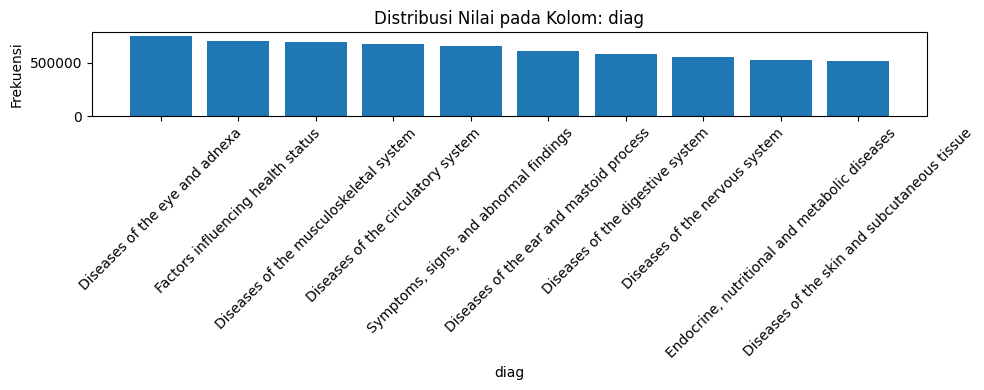


Frekuensi nilai unik di kolom: 'levelid'
   levelid   _count
0      1.0  7555540
1      2.0  2122766
2      NaN    16192


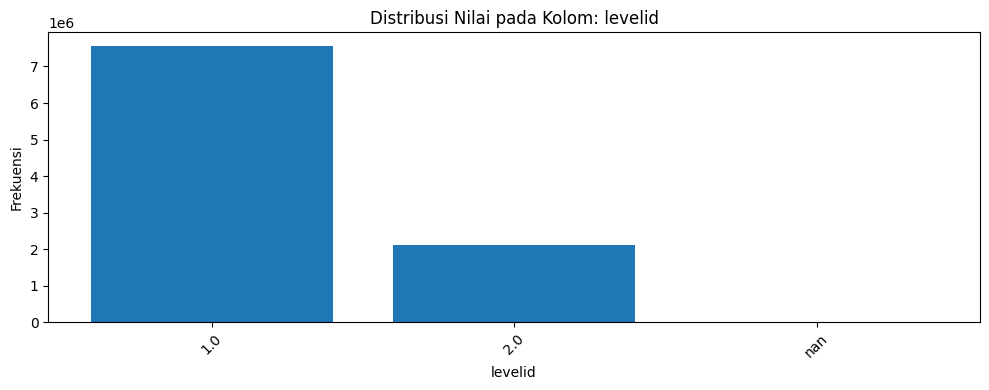


Frekuensi nilai unik di kolom: 'proc_code_clean'
                                      proc_code_clean   _count
0                                                None  5033241
1   Miscellaneous Diagnostic And Therapeutic Proce...  3817710
2             Operations On The Cardiovascular System   208951
3          Operations On The Nose, Mouth, And Pharynx   172618
4                               Operations On The Eye   144186
5              Operations On The Integumentary System   126849
6                               Operations On The Ear    64464
7            Operations On The Musculoskeletal System    42787
8                    Operations On The Urinary System    36929
9                              Obstetrical Procedures    12651
10               Operations On The Respiratory System     8300
11                   Operations On The Nervous System     7088
12                 Operations On The Digestive System     5775
13            Operations On The Female Genital Organs     5271
14   

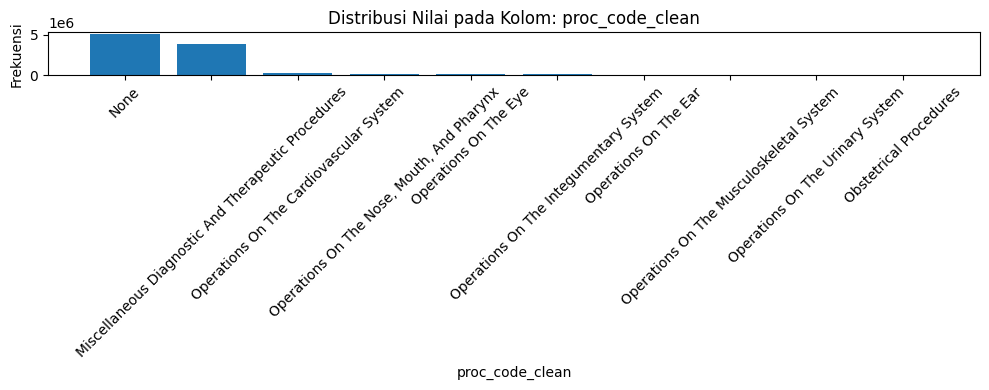

CPU times: total: 15.4 s
Wall time: 5.08 s


In [9]:
%%time

import matplotlib.pyplot as plt
from vaex import agg

for col in df_selected.column_names:
    print(f"\nFrekuensi nilai unik di kolom: '{col}'")
    
    # Group by dan hitung frekuensi
    result = df_selected.groupby(df_selected[col], agg.count()).sort(by='_count', ascending=False)
    
    # Konversi ke pandas untuk kemudahan visualisasi
    result_pd = result.to_pandas_df()
    
    print(result_pd)  # Cetak hasil

    # Jika terlalu banyak nilai unik, ambil 10 teratas agar grafiknya jelas
    top_n = 10
    top_result = result_pd.head(top_n)

    # Plot
    plt.figure(figsize=(10, 4))
    plt.bar(top_result[col].astype(str), top_result['_count'])
    plt.title(f'Distribusi Nilai pada Kolom: {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


### Diagnosa

In [4]:
%%time

df_gabungan[(df_gabungan['label'] == 0) & df_gabungan['diag'].isna()].count()


CPU times: total: 109 ms
Wall time: 254 ms


array(15804, dtype=int64)

In [10]:
# Drop baris data dengan Label== 0 dan diag  yang kosong
df_gabungan = df_gabungan[~((df_gabungan['label'] == 0) & df_gabungan['diag'].isna())]


In [11]:
%%time

df_gabungan[(df_gabungan['label'] == 1) & df_gabungan['diag'].isna()].count()


CPU times: total: 250 ms
Wall time: 107 ms


array(388, dtype=int64)

In [12]:
# Mengisi Data Kosong
## Diisi dengan Data Diagnosa yang paling Sedikit
df_gabungan['diag'] = df_gabungan['diag'].fillna('External causes of morbidity and mortality')


In [13]:
%%time

df_gabungan[(df_gabungan['label'] == 1) & df_gabungan['diag'].isna()].count()


CPU times: total: 2.42 s
Wall time: 458 ms


array(0, dtype=int64)

In [14]:
label_counts = df_gabungan['label'].value_counts()
label_counts

0    9435385
1     243309
dtype: int64

### Level ID

In [15]:
%%time

df_gabungan[(df_gabungan['label'] == 0) & df_gabungan['levelid'].isna()].count()


CPU times: total: 172 ms
Wall time: 132 ms


array(0, dtype=int64)

In [16]:
%%time

df_gabungan[(df_gabungan['label'] == 1) & df_gabungan['levelid'].isna()].count()


CPU times: total: 203 ms
Wall time: 84.5 ms


array(388, dtype=int64)

In [17]:
# Mengisi Data Kosong
## Diisi dengan Data Diagnosa yang paling Sedikit
df_gabungan['levelid'] = df_gabungan['levelid'].fillna(2.0)


In [18]:
%%time

df_gabungan[(df_gabungan['label'] == 1) & df_gabungan['levelid'].isna()].count()


CPU times: total: 93.8 ms
Wall time: 114 ms


array(0, dtype=int64)

In [19]:
label_counts = df_gabungan['label'].value_counts()
label_counts

0    9435385
1     243309
dtype: int64

### Procedure

In [20]:
%%time

df_gabungan[(df_gabungan['label'] == 0) & df_gabungan['proc_code_clean'].isna()].count()


CPU times: total: 281 ms
Wall time: 133 ms


array(4917359, dtype=int64)

In [21]:
# Drop baris data dengan Label== 0 dan Procedure  yang kosong
df_gabungan = df_gabungan[~((df_gabungan['label'] == 0) & df_gabungan['proc_code_clean'].isna())]


In [22]:
%%time

df_gabungan[(df_gabungan['label'] == 1) & df_gabungan['proc_code_clean'].isna()].count()


CPU times: total: 234 ms
Wall time: 138 ms


array(100078, dtype=int64)

In [23]:
# Mengisi Data Kosong
## Diisi dengan Data Procedure terbanyak kedua
df_gabungan['proc_code_clean'] = df_gabungan['proc_code_clean'].fillna('Operations On The Cardiovascular System')




In [24]:
label_counts = df_gabungan['label'].value_counts()
label_counts

0    4518026
1     243309
dtype: int64

In [25]:
df_gabungan.describe()

,dati2,typefaskes,usia,jenkel,pisat,jenispel,politujuan,diagfktp,biaya,jenispulang,kelasrawat,label,durasi_rawat,cbg1,cbg2,cbg3,diag,levelid,proc_code_clean
data_type,int64,string,int64,string,float64,int64,string,string,float64,float64,int64,int64,int64,string,int64,int64,string,float64,string
count,4761335,4761335,4761335,4761335,4761335,4761335,4761335,4761335,4761335,4761335,4761335,4761335,4761335,4761335,4761335,4761335,4761335,4761335,4761335
NA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
mean,192.4577293973224,--,41.03976909837262,--,2.336876737301618,1.9769543625894839,--,--,634811.2200168651,1.074583493915047,2.984405424108995,0.05110100423515674,0.09084195924042311,--,3.767859644406453,24.61473305280977,--,1.221981650104435,--
std,105.103451,--,21.565326,--,1.357823,0.150048,--,--,2171739.724066,0.481313,0.157433,0.220204,1.776704,--,1.108001,13.101147,--,0.415579,--
min,1,--,0,--,1.0,1,--,--,0.0,1.0,1,0,0,--,1,1,--,1.0,--
max,528,--,110,--,5.0,2,--,--,309451300.0,5.0,3,1,655,--,9,84,--,2.0,--


In [26]:
# Data Yang Tidak Ada Baris Kosong
df_gabungan.export_csv("DataGabungan2.csv")

# Melihat Persebaran Data

In [35]:
%%time
df_gabungan2 = vaex.from_csv("DataGabungan2.csv", convert=True, chunk_size=100_000)
df_gabungan2


## Untuk mengatasi Outlier

CPU times: total: 15.6 ms
Wall time: 46.2 ms


#,dati2,typefaskes,usia,jenkel,pisat,jenispel,politujuan,diagfktp,biaya,jenispulang,kelasrawat,label,durasi_rawat,cbg1,cbg2,cbg3,diag,levelid,proc_code_clean
0,17,KI,46,P,1.0,2,IGD,Diseases of the digestive system,186800.0,1.0,3,0,0,Q,5,42,Certain infectious and parasitic diseases,1.0,'Miscellaneous Diagnostic And Therapeutic Proced...
1,17,B,60,L,1.0,2,GND,Diseases of the digestive system,211400.0,1.0,3,0,0,Q,5,12,Diseases of the digestive system,1.0,'Miscellaneous Diagnostic And Therapeutic Proced...
2,17,B,15,L,4.0,2,IRM,Diseases of the musculoskeletal system,114400.0,1.0,3,0,0,M,3,16,Diseases of the musculoskeletal system,1.0,'Miscellaneous Diagnostic And Therapeutic Proced...
3,17,A,37,P,1.0,2,IGD,Diseases of the respiratory system,479000.0,1.0,3,0,0,J,3,13,Diseases of the respiratory system,1.0,'Miscellaneous Diagnostic And Therapeutic Proced...
4,17,I2,51,P,3.0,2,SAR,"Symptoms, signs, and abnormal findings",571000.0,1.0,3,0,0,Z,3,23,Diseases of the genitourinary system,1.0,'Miscellaneous Diagnostic And Therapeutic Proced...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"4,761,330",79,C,47,P,1.0,2,MAT,Diseases of the eye and adnexa,213700.0,1.0,3,0,0,H,3,12,"Endocrine, nutritional and metabolic diseases",1.0,'Miscellaneous Diagnostic And Therapeutic Proced...
"4,761,331",79,C,73,L,2.0,2,MAT,Diseases of the eye and adnexa,213700.0,1.0,3,0,0,H,3,12,Diseases of the eye and adnexa,1.0,'Miscellaneous Diagnostic And Therapeutic Proced...
"4,761,332",79,C,73,L,2.0,2,MAT,Diseases of the eye and adnexa,213700.0,1.0,3,0,0,H,3,12,"Endocrine, nutritional and metabolic diseases",2.0,'Miscellaneous Diagnostic And Therapeutic Proced...
"4,761,333",81,B,44,L,1.0,2,IGD,Diseases of the genitourinary system,259200.0,1.0,3,0,0,H,3,11,External causes of morbidity and mortality,2.0,'Miscellaneous Diagnostic And Therapeutic Proced...


## Dati2

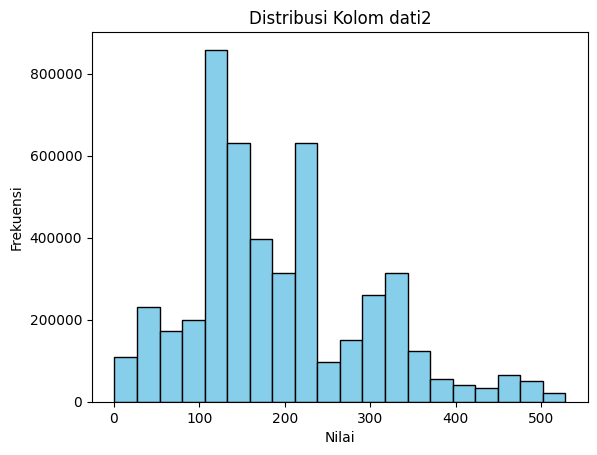

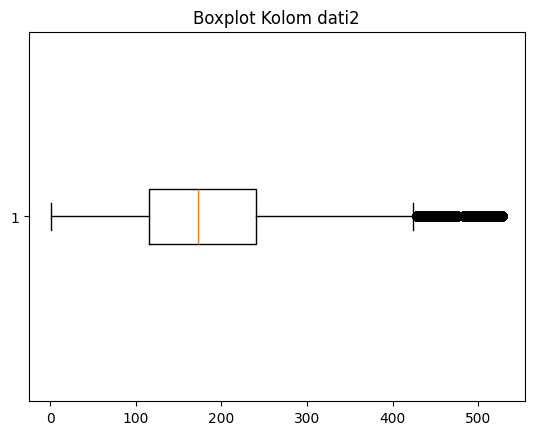

In [36]:
# Histogram
plt.hist(df_gabungan2['dati2'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribusi Kolom dati2')
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')
plt.show()

# Boxplot untuk mendeteksi outlier
plt.boxplot(df_gabungan2['dati2'], vert=False)
plt.title('Boxplot Kolom dati2')
plt.show()

## Tipe Faskes

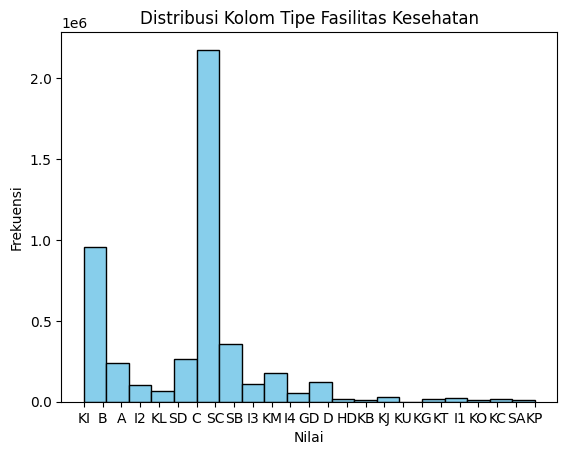

In [37]:
# Histogram
plt.hist(df_gabungan2['typefaskes'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribusi Kolom Tipe Fasilitas Kesehatan')
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')
plt.show()


## Usia

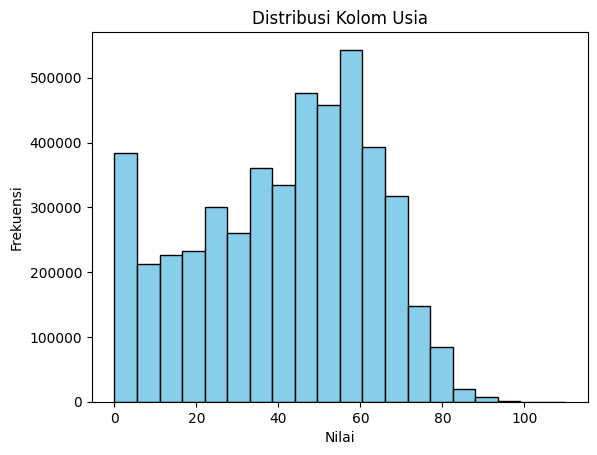

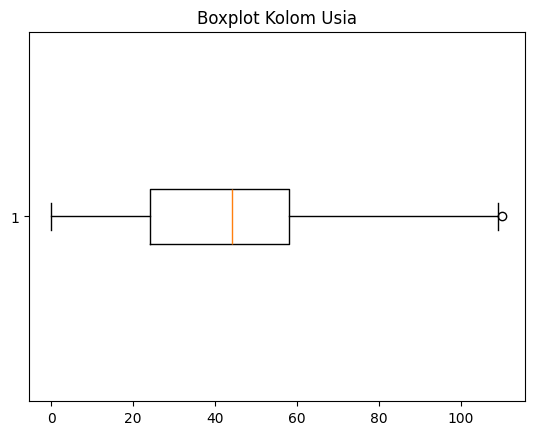

In [38]:
# Histogram
plt.hist(df_gabungan2['usia'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribusi Kolom Usia')
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')
plt.show()

# Boxplot untuk mendeteksi outlier
plt.boxplot(df_gabungan2['usia'], vert=False)
plt.title('Boxplot Kolom Usia')
plt.show()

## Poli Tujuan


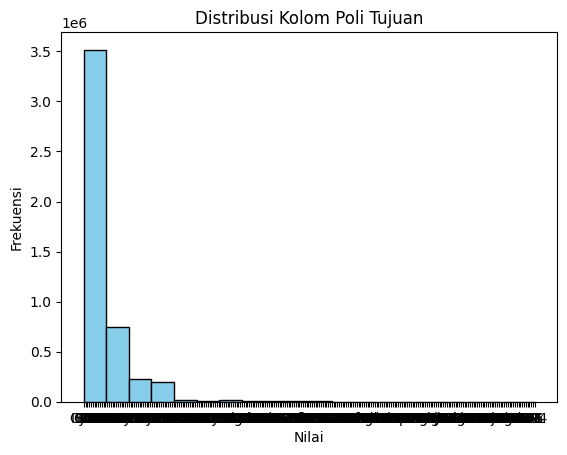

In [39]:
# Histogram
plt.hist(df_gabungan2['politujuan'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribusi Kolom Poli Tujuan')
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')
plt.show()


## Biaya

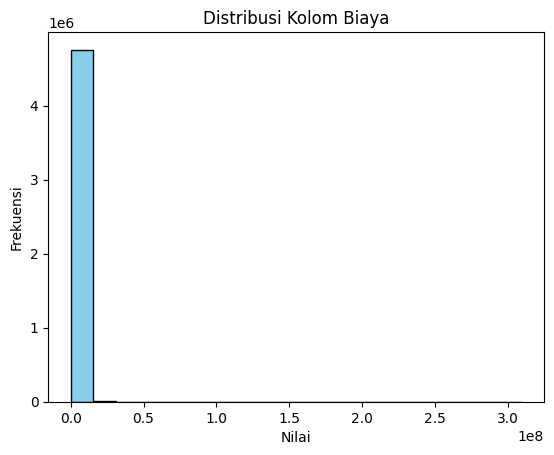

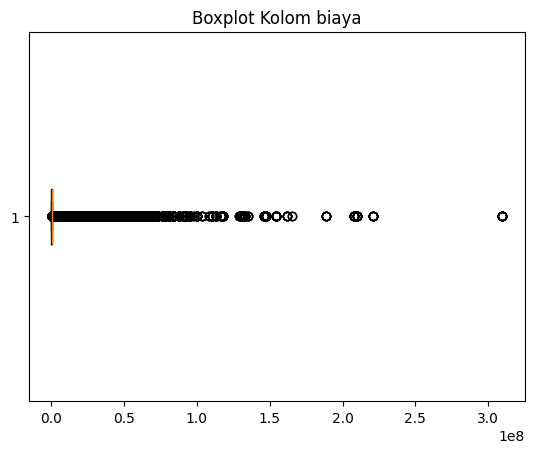

In [40]:

# Histogram
plt.hist(df_gabungan2['biaya'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribusi Kolom Biaya')
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')
plt.show()

# Boxplot untuk mendeteksi outlier
plt.boxplot(df_gabungan2['biaya'], vert=False)
plt.title('Boxplot Kolom biaya')
plt.show()


Untuk Kolom Biaya, nanti buatkan skenario baru untuk dilakukan uji coba terkait dengan biaya yang 0, drop

# Jumlah Unique Value Setiap Kolom

In [41]:
df_selected2 = df_gabungan2['dati2', 'typefaskes', 'usia', 'jenkel', 'pisat', 'jenispel', 'politujuan', 'diagfktp', 'biaya', 'jenispulang', 'kelasrawat', 'label', 'durasi_rawat', 'cbg1', 'cbg2', 'cbg3', 'diag', 'levelid', 'proc_code_clean']


Frekuensi nilai unik di kolom: 'dati2'
     dati2  _count
0      113  180326
1      342  148590
2      217  126195
3      115   92850
4       38   92000
..     ...     ...
483    490      48
484    503      46
485    517      23
486    527      11
487    366       1

[488 rows x 2 columns]


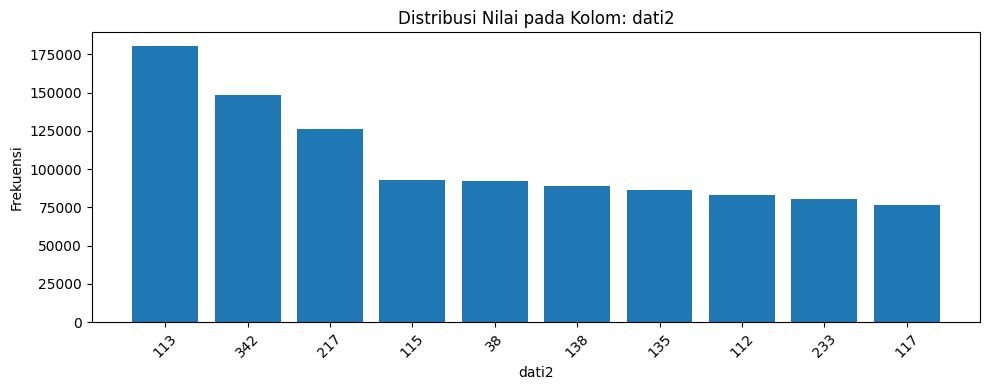


Frekuensi nilai unik di kolom: 'typefaskes'
   typefaskes   _count
0          SC  1221201
1           C   953630
2           B   897471
3          SB   358833
4          SD   261282
5           A   241353
6          KM   179233
7           D   117852
8          I3   108426
9          I2   105587
10         KL    64265
11         KI    56272
12         I4    54710
13         KJ    27641
14         I1    21445
15         KC    18211
16         HD    14931
17         KO    13478
18         KG    12952
19         KB    10060
20         KP     6944
21         SA     6709
22         GD     4010
23         KT     3744
24         KU     1095


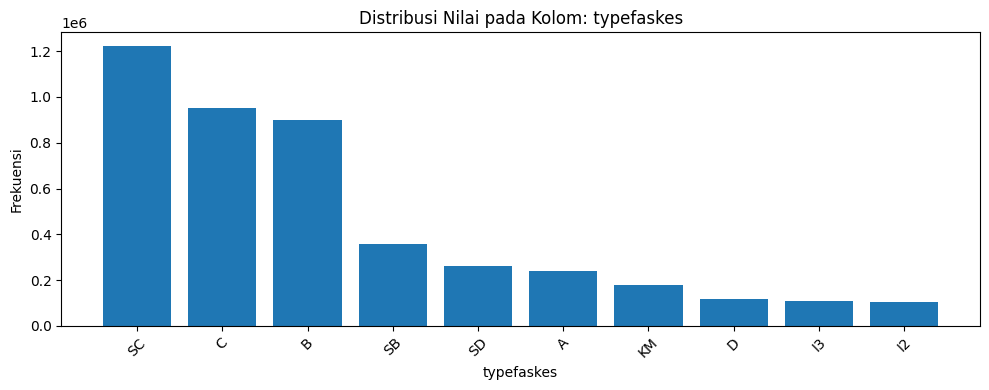


Frekuensi nilai unik di kolom: 'usia'
     usia  _count
0       0  117882
1      54   94529
2      53   93053
3      55   92596
4      59   92201
..    ...     ...
105   106       6
106   107       6
107   104       5
108   109       1
109   110       1

[110 rows x 2 columns]


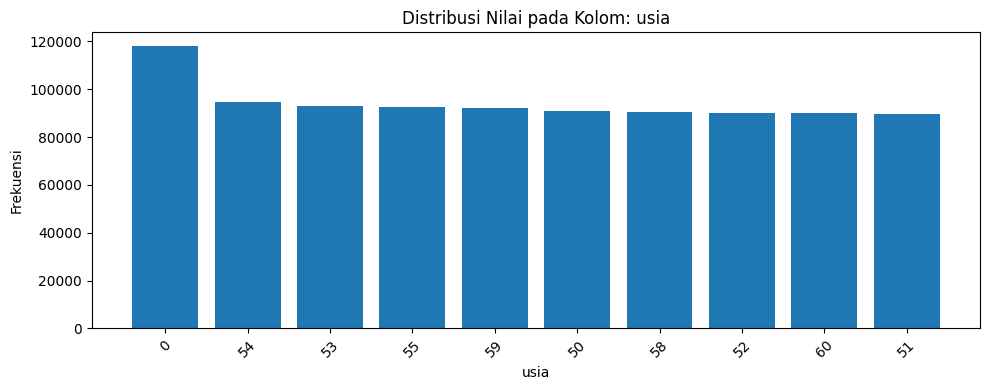


Frekuensi nilai unik di kolom: 'jenkel'
  jenkel   _count
0      P  2583526
1      L  2177809


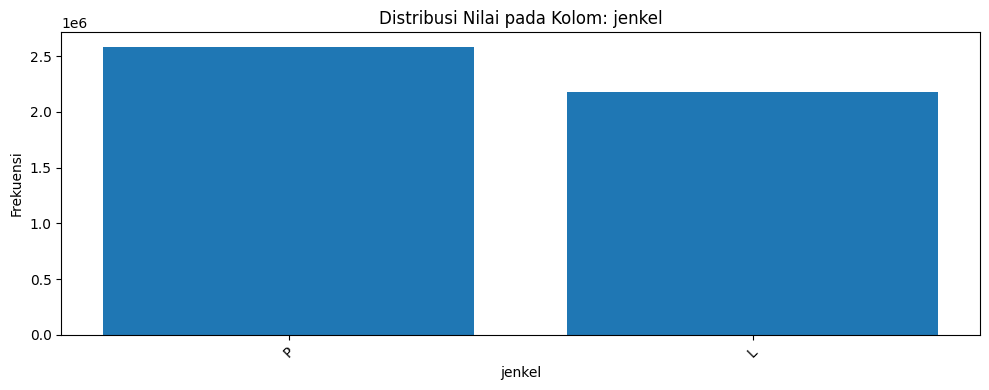


Frekuensi nilai unik di kolom: 'pisat'
   pisat   _count
0    1.0  2242239
1    3.0  1115875
2    4.0  1115209
3    5.0   166643
4    2.0   121369


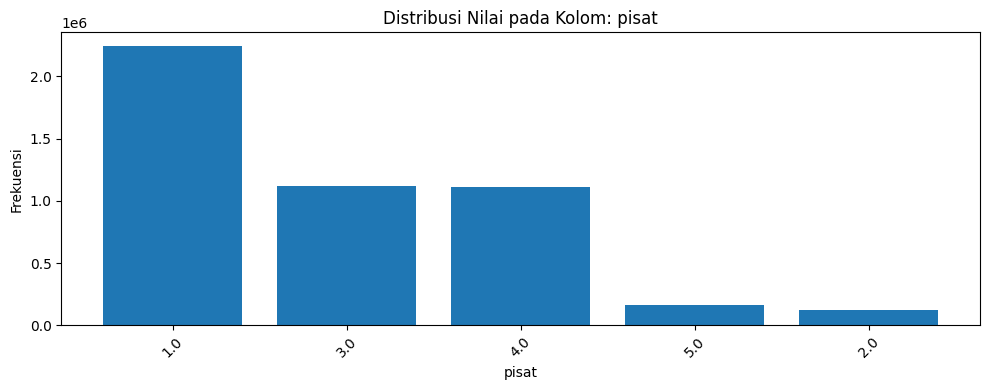


Frekuensi nilai unik di kolom: 'jenispel'
   jenispel   _count
0         2  4651607
1         1   109728


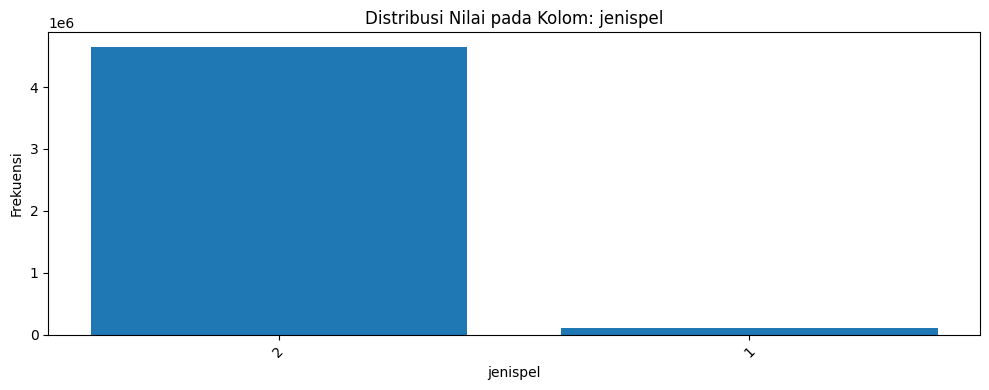


Frekuensi nilai unik di kolom: 'politujuan'
    politujuan  _count
0          IGD  940400
1          MAT  537142
2          INT  529631
3          THT  427669
4          IRM  281780
..         ...     ...
247        044       1
248        CAP       1
249        055       1
250        165       1
251        ugd       1

[252 rows x 2 columns]


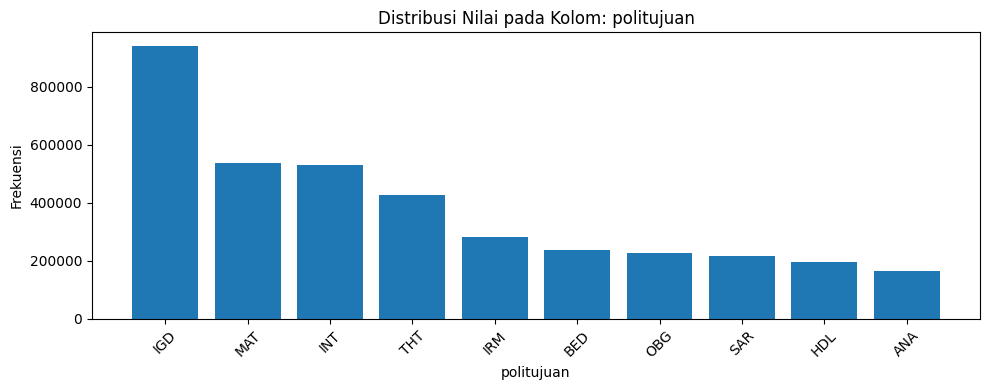


Frekuensi nilai unik di kolom: 'diagfktp'
                                         diagfktp  _count
0               Factors influencing health status  649501
1                  Diseases of the eye and adnexa  485532
2            Diseases of the genitourinary system  372784
3         Diseases of the ear and mastoid process  338510
4          Symptoms, signs, and abnormal findings  318795
5                Diseases of the digestive system  308537
6          Diseases of the musculoskeletal system  302497
7                      Injury and external causes  286106
8              Diseases of the circulatory system  270999
9   Endocrine, nutritional and metabolic diseases  211919
10               Mental and behavioural disorders  191850
11             Diseases of the respiratory system  186387
12                                      Neoplasms  182417
13                 Diseases of the nervous system  134529
14        Diseases of the blood and immune system  125817
15      Certain infectious an

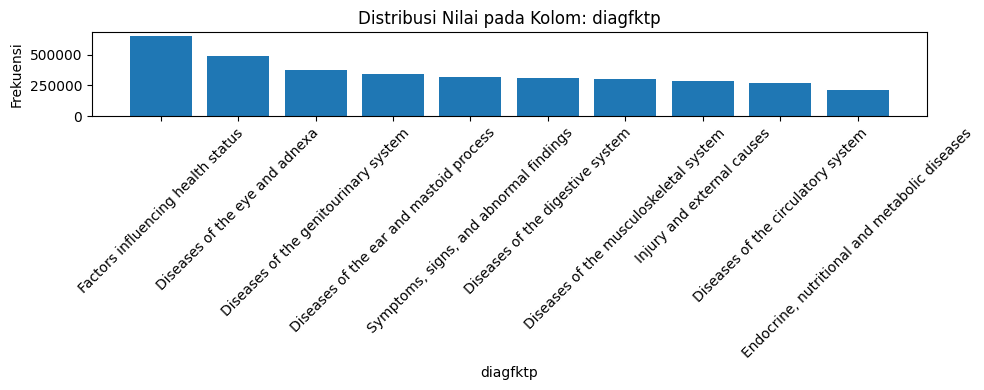


Frekuensi nilai unik di kolom: 'biaya'
           biaya  _count
0       190400.0  168936
1       183300.0   94391
2      2147000.0   75809
3       183500.0   70672
4       112800.0   70461
...          ...     ...
13685  1323200.0       1
13686  7622700.0       1
13687  4311500.0       1
13688  5393000.0       1
13689  2250800.0       1

[13690 rows x 2 columns]


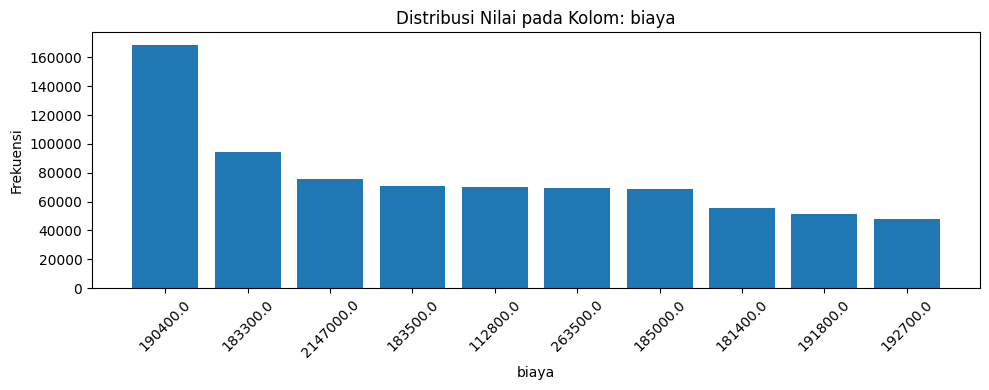


Frekuensi nilai unik di kolom: 'jenispulang'
   jenispulang   _count
0          1.0  4614335
1          2.0    65235
2          5.0    52727
3          4.0    20898
4          3.0     8140


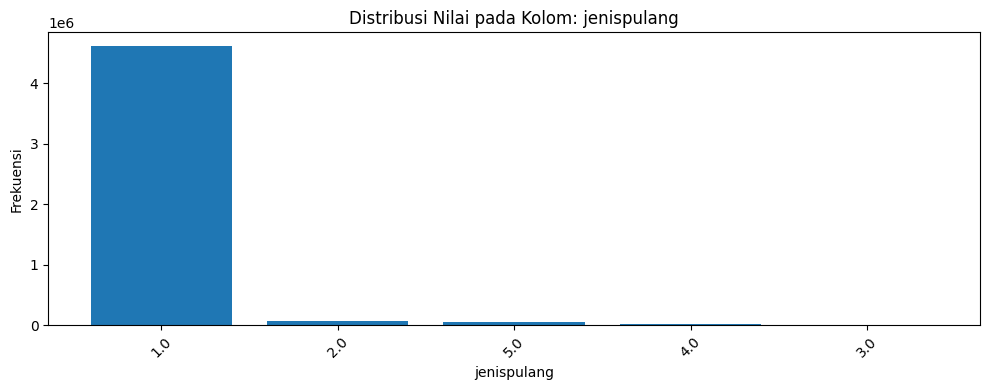


Frekuensi nilai unik di kolom: 'kelasrawat'
   kelasrawat   _count
0           3  4709543
1           2    29333
2           1    22459


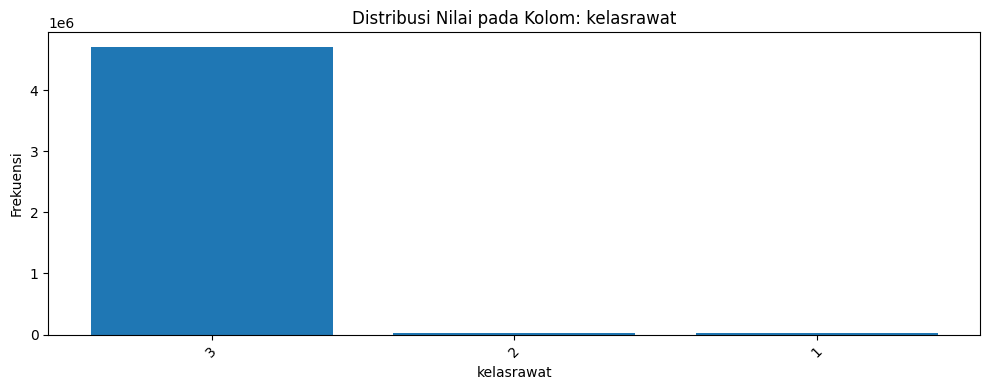


Frekuensi nilai unik di kolom: 'label'
   label   _count
0      0  4518026
1      1   243309


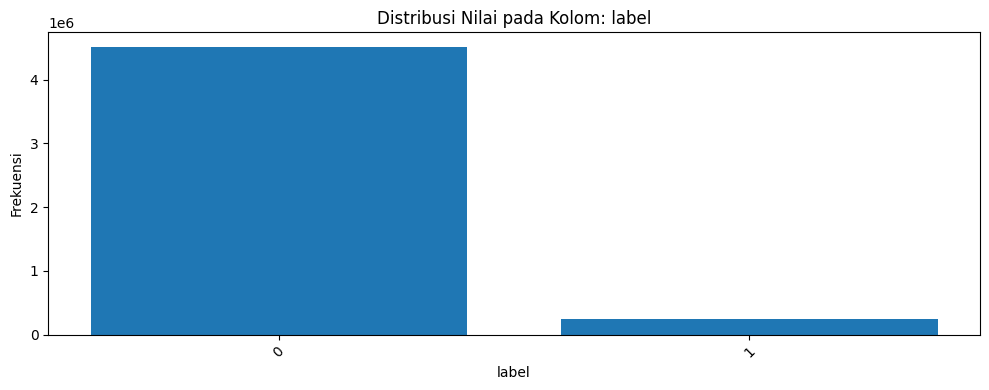


Frekuensi nilai unik di kolom: 'durasi_rawat'
     durasi_rawat   _count
0               0  4656442
1               2    29295
2               1    19975
3               3    19702
4               4    11062
..            ...      ...
123           464        1
124           184        1
125            84        1
126           327        1
127           177        1

[128 rows x 2 columns]


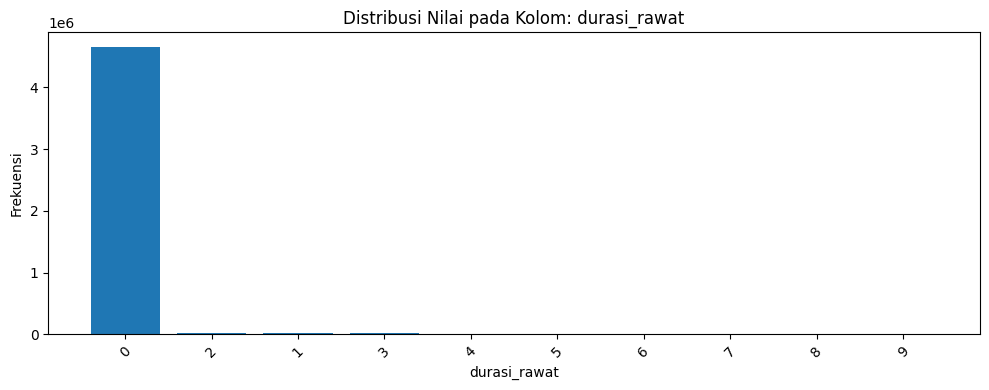


Frekuensi nilai unik di kolom: 'cbg1'
   cbg1   _count
0     Q  1531571
1     Z   716175
2     U   546790
3     H   431056
4     M   295902
5     N   276373
6     J   216910
7     F   185081
8     L   171728
9     D    99150
10    K    86907
11    I    67312
12    G    51458
13    P    35428
14    C    13692
15    W    12397
16    O    10181
17    E     7029
18    A     2984
19    V     1488
20    B     1294
21    S      386
22    T       43


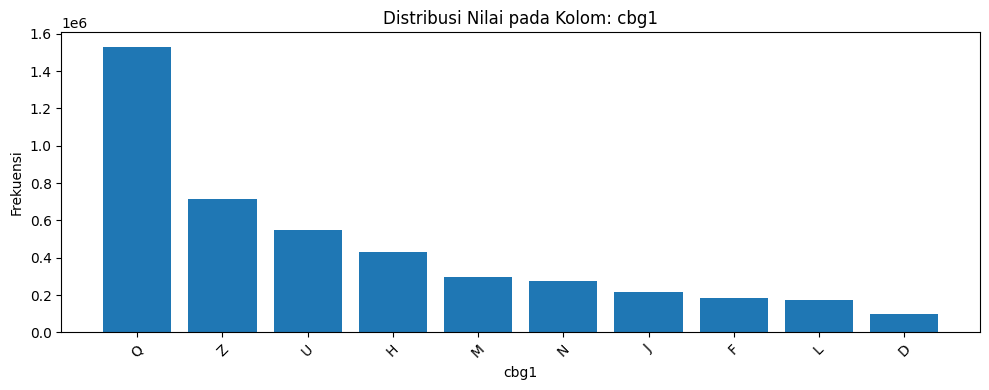


Frekuensi nilai unik di kolom: 'cbg2'
   cbg2   _count
0     3  2656320
1     5  1808849
2     2   175931
3     4    48444
4     1    26182
5     8    26108
6     9     9320
7     6     8994
8     7     1187


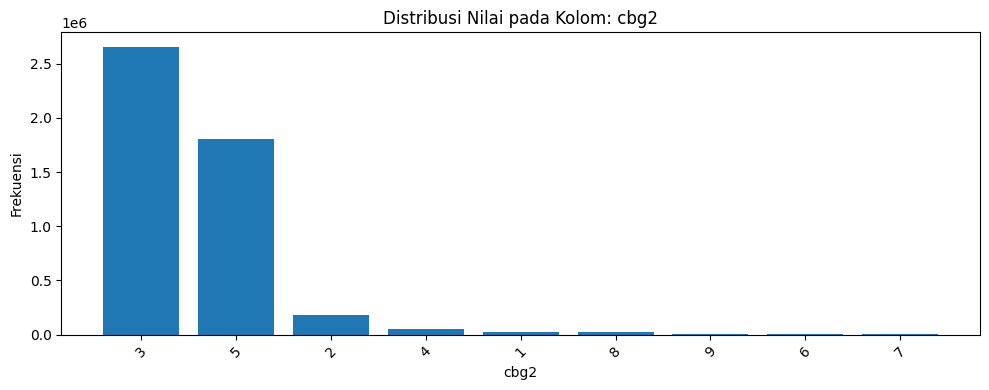


Frekuensi nilai unik di kolom: 'cbg3'
    cbg3  _count
0     44  903352
1     12  574922
2     15  523333
3     16  437076
4     13  358856
..   ...     ...
56    65      52
57    81      51
58    64      28
59    72      24
60    61       1

[61 rows x 2 columns]


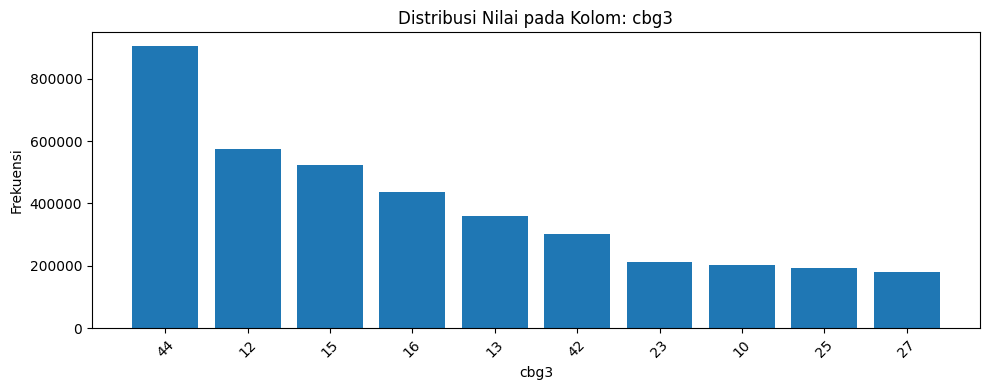


Frekuensi nilai unik di kolom: 'diag'
                                             diag  _count
0                  Diseases of the eye and adnexa  471409
1         Diseases of the ear and mastoid process  371995
2               Factors influencing health status  364429
3            Diseases of the genitourinary system  354637
4          Diseases of the musculoskeletal system  327446
5                      Injury and external causes  313415
6                Diseases of the digestive system  312188
7          Symptoms, signs, and abnormal findings  268691
8              Diseases of the circulatory system  260052
9              Diseases of the respiratory system  239905
10               Mental and behavioural disorders  215365
11  Endocrine, nutritional and metabolic diseases  211018
12                 Diseases of the nervous system  195267
13                                      Neoplasms  181397
14        Diseases of the blood and immune system  149035
15   Diseases of the skin and sub

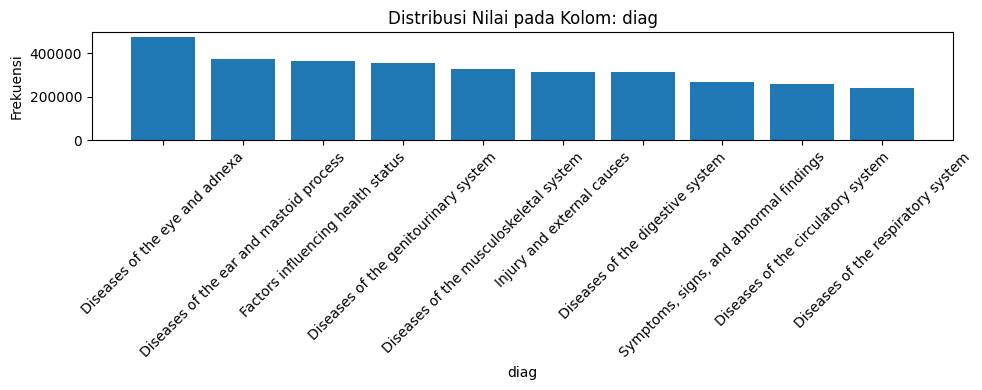


Frekuensi nilai unik di kolom: 'levelid'
   levelid   _count
0      1.0  3704406
1      2.0  1056929


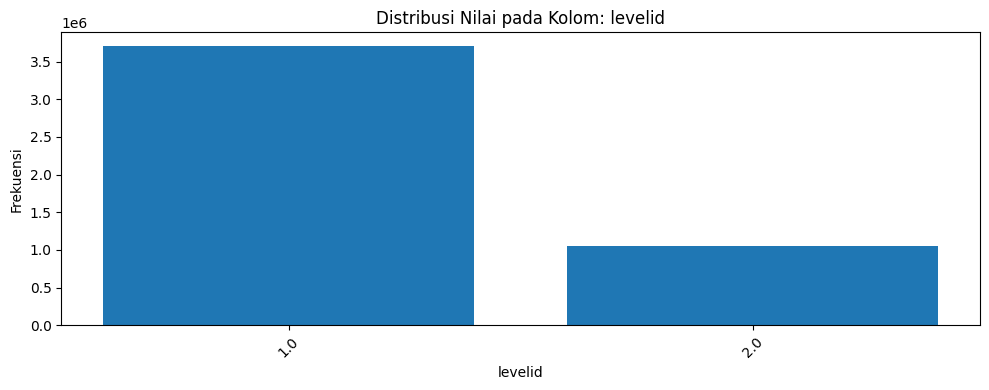


Frekuensi nilai unik di kolom: 'proc_code_clean'
                                      proc_code_clean   _count
0   Miscellaneous Diagnostic And Therapeutic Proce...  3817710
1             Operations On The Cardiovascular System   309029
2          Operations On The Nose, Mouth, And Pharynx   172618
3                               Operations On The Eye   144186
4              Operations On The Integumentary System   126849
5                               Operations On The Ear    64464
6            Operations On The Musculoskeletal System    42787
7                    Operations On The Urinary System    36929
8                              Obstetrical Procedures    12651
9                Operations On The Respiratory System     8300
10                   Operations On The Nervous System     7088
11                 Operations On The Digestive System     5775
12            Operations On The Female Genital Organs     5271
13       Operations On The Hemic And Lymphatic System     2692
14   

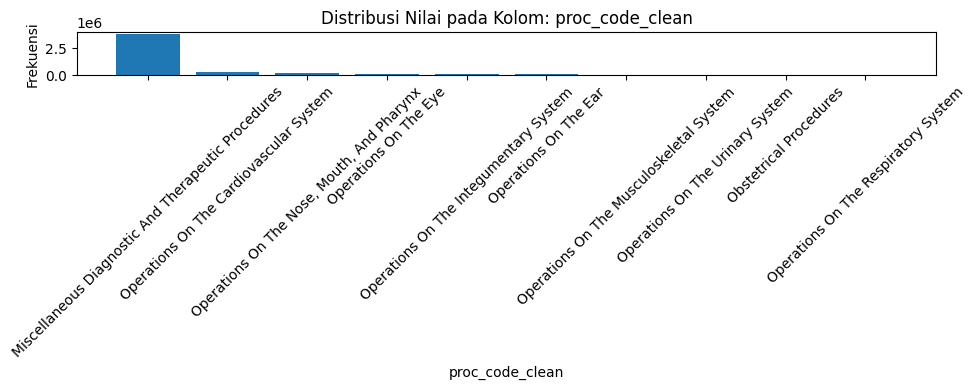

CPU times: total: 23.3 s
Wall time: 12.1 s


In [42]:
%%time

import matplotlib.pyplot as plt
from vaex import agg

for col in df_selected2.column_names:
    print(f"\nFrekuensi nilai unik di kolom: '{col}'")
    
    # Group by dan hitung frekuensi
    result = df_selected2.groupby(df_selected2[col], agg.count()).sort(by='_count', ascending=False)
    
    # Konversi ke pandas untuk kemudahan visualisasi
    result_pd = result.to_pandas_df()
    
    print(result_pd)  # Cetak hasil

    # Jika terlalu banyak nilai unik, ambil 10 teratas agar grafiknya jelas
    top_n = 10
    top_result = result_pd.head(top_n)

    # Plot
    plt.figure(figsize=(10, 4))
    plt.bar(top_result[col].astype(str), top_result['_count'])
    plt.title(f'Distribusi Nilai pada Kolom: {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [43]:
df_gabungan2.describe()

,dati2,typefaskes,usia,jenkel,pisat,jenispel,politujuan,diagfktp,biaya,jenispulang,kelasrawat,label,durasi_rawat,cbg1,cbg2,cbg3,diag,levelid,proc_code_clean
data_type,int64,string,int64,string,float64,int64,string,string,float64,float64,int64,int64,int64,string,int64,int64,string,float64,string
count,4761335,4761335,4761335,4761335,4761335,4761335,4761335,4761335,4761335,4761335,4761335,4761335,4761335,4761335,4761335,4761335,4761335,4761335,4761335
NA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
mean,192.4577293973224,--,41.03976909837262,--,2.336876737301618,1.9769543625894839,--,--,634811.2200168651,1.074583493915047,2.984405424108995,0.05110100423515674,0.09084195924042311,--,3.767859644406453,24.61473305280977,--,1.221981650104435,--
std,105.103451,--,21.565326,--,1.357823,0.150048,--,--,2171739.724066,0.481313,0.157433,0.220204,1.776704,--,1.108001,13.101147,--,0.415579,--
min,1,--,0,--,1.0,1,--,--,0.0,1.0,1,0,0,--,1,1,--,1.0,--
max,528,--,110,--,5.0,2,--,--,309451300.0,5.0,3,1,655,--,9,84,--,2.0,--


In [44]:
df_gabungan2

#,dati2,typefaskes,usia,jenkel,pisat,jenispel,politujuan,diagfktp,biaya,jenispulang,kelasrawat,label,durasi_rawat,cbg1,cbg2,cbg3,diag,levelid,proc_code_clean
0,17,KI,46,P,1.0,2,IGD,Diseases of the digestive system,186800.0,1.0,3,0,0,Q,5,42,Certain infectious and parasitic diseases,1.0,'Miscellaneous Diagnostic And Therapeutic Proced...
1,17,B,60,L,1.0,2,GND,Diseases of the digestive system,211400.0,1.0,3,0,0,Q,5,12,Diseases of the digestive system,1.0,'Miscellaneous Diagnostic And Therapeutic Proced...
2,17,B,15,L,4.0,2,IRM,Diseases of the musculoskeletal system,114400.0,1.0,3,0,0,M,3,16,Diseases of the musculoskeletal system,1.0,'Miscellaneous Diagnostic And Therapeutic Proced...
3,17,A,37,P,1.0,2,IGD,Diseases of the respiratory system,479000.0,1.0,3,0,0,J,3,13,Diseases of the respiratory system,1.0,'Miscellaneous Diagnostic And Therapeutic Proced...
4,17,I2,51,P,3.0,2,SAR,"Symptoms, signs, and abnormal findings",571000.0,1.0,3,0,0,Z,3,23,Diseases of the genitourinary system,1.0,'Miscellaneous Diagnostic And Therapeutic Proced...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"4,761,330",79,C,47,P,1.0,2,MAT,Diseases of the eye and adnexa,213700.0,1.0,3,0,0,H,3,12,"Endocrine, nutritional and metabolic diseases",1.0,'Miscellaneous Diagnostic And Therapeutic Proced...
"4,761,331",79,C,73,L,2.0,2,MAT,Diseases of the eye and adnexa,213700.0,1.0,3,0,0,H,3,12,Diseases of the eye and adnexa,1.0,'Miscellaneous Diagnostic And Therapeutic Proced...
"4,761,332",79,C,73,L,2.0,2,MAT,Diseases of the eye and adnexa,213700.0,1.0,3,0,0,H,3,12,"Endocrine, nutritional and metabolic diseases",2.0,'Miscellaneous Diagnostic And Therapeutic Proced...
"4,761,333",81,B,44,L,1.0,2,IGD,Diseases of the genitourinary system,259200.0,1.0,3,0,0,H,3,11,External causes of morbidity and mortality,2.0,'Miscellaneous Diagnostic And Therapeutic Proced...


# Encoding

In [45]:
for col in df_selected2.get_column_names():
    print(f"Kolom '{col}' memiliki {df_selected2[col].nunique()} nilai unik.")

Kolom 'dati2' memiliki 488 nilai unik.
Kolom 'typefaskes' memiliki 25 nilai unik.
Kolom 'usia' memiliki 110 nilai unik.
Kolom 'jenkel' memiliki 2 nilai unik.
Kolom 'pisat' memiliki 5 nilai unik.
Kolom 'jenispel' memiliki 2 nilai unik.
Kolom 'politujuan' memiliki 252 nilai unik.
Kolom 'diagfktp' memiliki 24 nilai unik.
Kolom 'biaya' memiliki 13690 nilai unik.
Kolom 'jenispulang' memiliki 5 nilai unik.
Kolom 'kelasrawat' memiliki 3 nilai unik.
Kolom 'label' memiliki 2 nilai unik.
Kolom 'durasi_rawat' memiliki 128 nilai unik.
Kolom 'cbg1' memiliki 23 nilai unik.
Kolom 'cbg2' memiliki 9 nilai unik.
Kolom 'cbg3' memiliki 61 nilai unik.
Kolom 'diag' memiliki 23 nilai unik.
Kolom 'levelid' memiliki 2 nilai unik.
Kolom 'proc_code_clean' memiliki 18 nilai unik.


In [46]:
import vaex.ml

## Label Encoder

In [47]:
label_encoder = vaex.ml.LabelEncoder(features=['typefaskes', 'jenkel', 'cbg1', 'proc_code_clean'])
df_gabungan2 = label_encoder.fit_transform(df_gabungan2)


## Bayesian Target Encoder

In [48]:
bayes_encoder = vaex.ml.BayesianTargetEncoder(features=['politujuan'], target='label')
df_gabungan2 = bayes_encoder.fit_transform(df_gabungan2)

In [49]:
df_gabungan2

#,dati2,typefaskes,usia,jenkel,pisat,jenispel,politujuan,diagfktp,biaya,jenispulang,kelasrawat,label,durasi_rawat,cbg1,cbg2,cbg3,diag,levelid,proc_code_clean,label_encoded_typefaskes,label_encoded_jenkel,label_encoded_cbg1,label_encoded_proc_code_clean,mean_encoded_politujuan
0,17,KI,46,P,1.0,2,IGD,Diseases of the digestive system,186800.0,1.0,3,0,0,Q,5,42,Certain infectious and parasitic diseases,1.0,'Miscellaneous Diagnostic And Therapeutic Proced...,7,1,4,14,0.027832121318897944
1,17,B,60,L,1.0,2,GND,Diseases of the digestive system,211400.0,1.0,3,0,0,Q,5,12,Diseases of the digestive system,1.0,'Miscellaneous Diagnostic And Therapeutic Proced...,10,0,4,14,0.004655543983288377
2,17,B,15,L,4.0,2,IRM,Diseases of the musculoskeletal system,114400.0,1.0,3,0,0,M,3,16,Diseases of the musculoskeletal system,1.0,'Miscellaneous Diagnostic And Therapeutic Proced...,10,0,16,14,0.01182811870449665
3,17,A,37,P,1.0,2,IGD,Diseases of the respiratory system,479000.0,1.0,3,0,0,J,3,13,Diseases of the respiratory system,1.0,'Miscellaneous Diagnostic And Therapeutic Proced...,8,1,8,14,0.027832121318897944
4,17,I2,51,P,3.0,2,SAR,"Symptoms, signs, and abnormal findings",571000.0,1.0,3,0,0,Z,3,23,Diseases of the genitourinary system,1.0,'Miscellaneous Diagnostic And Therapeutic Proced...,2,1,6,14,0.040830350785725604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"4,761,330",79,C,47,P,1.0,2,MAT,Diseases of the eye and adnexa,213700.0,1.0,3,0,0,H,3,12,"Endocrine, nutritional and metabolic diseases",1.0,'Miscellaneous Diagnostic And Therapeutic Proced...,0,1,14,14,0.038072433094254586
"4,761,331",79,C,73,L,2.0,2,MAT,Diseases of the eye and adnexa,213700.0,1.0,3,0,0,H,3,12,Diseases of the eye and adnexa,1.0,'Miscellaneous Diagnostic And Therapeutic Proced...,0,0,14,14,0.038072433094254586
"4,761,332",79,C,73,L,2.0,2,MAT,Diseases of the eye and adnexa,213700.0,1.0,3,0,0,H,3,12,"Endocrine, nutritional and metabolic diseases",2.0,'Miscellaneous Diagnostic And Therapeutic Proced...,0,0,14,14,0.038072433094254586
"4,761,333",81,B,44,L,1.0,2,IGD,Diseases of the genitourinary system,259200.0,1.0,3,0,0,H,3,11,External causes of morbidity and mortality,2.0,'Miscellaneous Diagnostic And Therapeutic Proced...,10,0,14,14,0.027832121318897944


In [50]:
%%time

df_gabungan2 = df_gabungan2.drop(['typefaskes', 'jenkel', 'cbg1', 'proc_code_clean', 'politujuan'])


CPU times: total: 0 ns
Wall time: 14.8 ms


## Encoding Kode Diagnosa

In [51]:
df_gabungan2.describe()

,dati2,usia,pisat,jenispel,diagfktp,biaya,jenispulang,kelasrawat,label,durasi_rawat,cbg2,cbg3,diag,levelid,label_encoded_typefaskes,label_encoded_jenkel,label_encoded_cbg1,label_encoded_proc_code_clean,mean_encoded_politujuan
data_type,int64,int64,float64,int64,string,float64,float64,int64,int64,int64,int64,int64,string,float64,int32,int32,int32,int32,float64
count,4761335,4761335,4761335,4761335,4761335,4761335,4761335,4761335,4761335,4761335,4761335,4761335,4761335,4761335,4761335,4761335,4761335,4761335,4761335
NA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
mean,192.4577293973224,41.03976909837262,2.336876737301618,1.9769543625894839,--,634811.2200168651,1.074583493915047,2.984405424108995,0.05110100423515674,0.09084195924042311,3.767859644406453,24.61473305280977,--,1.221981650104435,11.150757928186108,0.5426053827340441,9.340403059226036,12.94839745575558,0.05113815882674326
std,105.103451,21.565326,1.357823,0.150048,--,2171739.724066,0.481313,0.157433,0.220204,1.776704,1.108001,13.101147,--,0.415579,7.394401,0.498181,5.974836,2.775392,0.067305
min,1,0,1.0,1,--,0.0,1.0,1,0,0,1,1,--,1.0,0,0,0,0,0.001914
max,528,110,5.0,2,--,309451300.0,5.0,3,1,655,9,84,--,2.0,24,1,22,17,0.237557


In [52]:
df_selected2 = df_gabungan2['diag', 'diagfktp']


Frekuensi nilai unik di kolom: 'diag'
                                             diag  _count
0                  Diseases of the eye and adnexa  471409
1         Diseases of the ear and mastoid process  371995
2               Factors influencing health status  364429
3            Diseases of the genitourinary system  354637
4          Diseases of the musculoskeletal system  327446
5                      Injury and external causes  313415
6                Diseases of the digestive system  312188
7          Symptoms, signs, and abnormal findings  268691
8              Diseases of the circulatory system  260052
9              Diseases of the respiratory system  239905
10               Mental and behavioural disorders  215365
11  Endocrine, nutritional and metabolic diseases  211018
12                 Diseases of the nervous system  195267
13                                      Neoplasms  181397
14        Diseases of the blood and immune system  149035
15   Diseases of the skin and sub

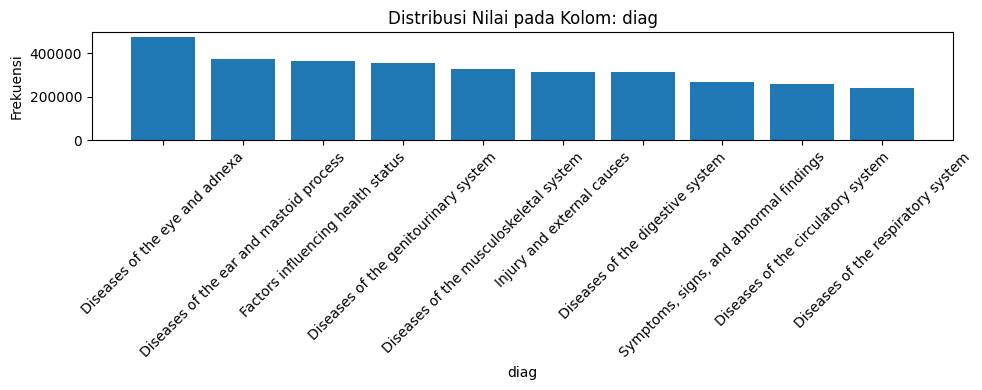


Frekuensi nilai unik di kolom: 'diagfktp'
                                         diagfktp  _count
0               Factors influencing health status  649501
1                  Diseases of the eye and adnexa  485532
2            Diseases of the genitourinary system  372784
3         Diseases of the ear and mastoid process  338510
4          Symptoms, signs, and abnormal findings  318795
5                Diseases of the digestive system  308537
6          Diseases of the musculoskeletal system  302497
7                      Injury and external causes  286106
8              Diseases of the circulatory system  270999
9   Endocrine, nutritional and metabolic diseases  211919
10               Mental and behavioural disorders  191850
11             Diseases of the respiratory system  186387
12                                      Neoplasms  182417
13                 Diseases of the nervous system  134529
14        Diseases of the blood and immune system  125817
15      Certain infectious an

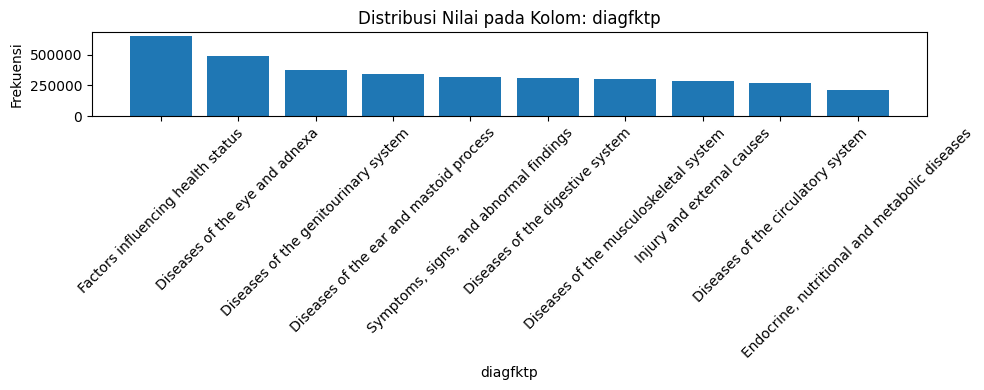

CPU times: total: 9.36 s
Wall time: 2.42 s


In [53]:
%%time

import matplotlib.pyplot as plt
from vaex import agg

for col in df_selected2.column_names:
    print(f"\nFrekuensi nilai unik di kolom: '{col}'")
    
    # Group by dan hitung frekuensi
    result = df_selected2.groupby(df_selected2[col], agg.count()).sort(by='_count', ascending=False)
    
    # Konversi ke pandas untuk kemudahan visualisasi
    result_pd = result.to_pandas_df()
    
    print(result_pd)  # Cetak hasil

    # Jika terlalu banyak nilai unik, ambil 10 teratas agar grafiknya jelas
    top_n = 10
    top_result = result_pd.head(top_n)

    # Plot
    plt.figure(figsize=(10, 4))
    plt.bar(top_result[col].astype(str), top_result['_count'])
    plt.title(f'Distribusi Nilai pada Kolom: {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [54]:

df_gabungan2 = df_gabungan2[df_gabungan2.diag != 'Uncategorized']



In [55]:
df_gabungan2 = df_gabungan2[(df_gabungan2.diagfktp != 'Uncategorized') & (df_gabungan2.diagfktp != 'Invalid')]

In [56]:
df_selected2 = df_gabungan2['diag', 'diagfktp']

In [57]:
for col in df_selected2.column_names:
    print(f"\nFrekuensi nilai unik di kolom: '{col}'")
    
    # Group by dan hitung frekuensi
    result = df_selected2.groupby(df_selected2[col], agg.count()).sort(by='_count', ascending=False)
    
    # Konversi ke pandas untuk kemudahan visualisasi
    result_pd = result.to_pandas_df()
    
    print(result_pd)  # Cetak hasil


Frekuensi nilai unik di kolom: 'diag'
                                             diag  _count
0                  Diseases of the eye and adnexa  471404
1         Diseases of the ear and mastoid process  371988
2               Factors influencing health status  364427
3            Diseases of the genitourinary system  354617
4          Diseases of the musculoskeletal system  327439
5                      Injury and external causes  313295
6                Diseases of the digestive system  312172
7          Symptoms, signs, and abnormal findings  268659
8              Diseases of the circulatory system  260041
9              Diseases of the respiratory system  239870
10               Mental and behavioural disorders  215362
11  Endocrine, nutritional and metabolic diseases  211009
12                 Diseases of the nervous system  195259
13                                      Neoplasms  181387
14        Diseases of the blood and immune system  149031
15   Diseases of the skin and sub

In [58]:
## Encoding untuk Code Diagnosa
import vaex


unique_values = set(df_gabungan2['diagfktp'].unique() + df_gabungan2['diag'].unique())

label_mapping = {val: idx for idx, val in enumerate(sorted(unique_values))}

def encode_column(column):
    return column.map(label_mapping)

# 4. Terapkan ke kedua kolom
# df_gabungan3 = df_gabungan3.assign(diagfktp_encoded=encode_column(df_gabungan3['diagfktp']))
# df_gabungan3 = df_gabungan3.assign(diag_encoded=encode_column(df_gabungan3['diag']))

df_gabungan2['diagfktp_encoded'] = df_gabungan2['diagfktp'].map(label_mapping)
df_gabungan2['diag_encoded'] = df_gabungan2['diag'].map(label_mapping)
# Lihat hasil
# df_gabungan3[['diagfktp', 'diagfktp_encoded', 'diag', 'diag_encoded']]


In [59]:
df_gabungan2[['diagfktp', 'diagfktp_encoded', 'diag', 'diag_encoded']].head(10)

#,diagfktp,diagfktp_encoded,diag,diag_encoded
0,Diseases of the digestive system,5,Certain infectious and parasitic diseases,0
1,Diseases of the digestive system,5,Diseases of the digestive system,5
2,Diseases of the musculoskeletal system,9,Diseases of the musculoskeletal system,9
3,Diseases of the respiratory system,11,Diseases of the respiratory system,11
4,"Symptoms, signs, and abnormal findings",21,Diseases of the genitourinary system,8
5,Diseases of the circulatory system,4,Diseases of the circulatory system,4
6,Diseases of the musculoskeletal system,9,Diseases of the musculoskeletal system,9
7,Diseases of the circulatory system,4,Diseases of the circulatory system,4
8,Diseases of the circulatory system,4,Diseases of the musculoskeletal system,9
9,Diseases of the musculoskeletal system,9,Diseases of the skin and subcutaneous tissue,12


In [60]:
df_gabungan2

#,dati2,usia,pisat,jenispel,diagfktp,biaya,jenispulang,kelasrawat,label,durasi_rawat,cbg2,cbg3,diag,levelid,label_encoded_typefaskes,label_encoded_jenkel,label_encoded_cbg1,label_encoded_proc_code_clean,mean_encoded_politujuan,diagfktp_encoded,diag_encoded
0,17,46,1.0,2,Diseases of the digestive system,186800.0,1.0,3,0,0,5,42,Certain infectious and parasitic diseases,1.0,7,1,4,14,0.027832121318897944,5,0
1,17,60,1.0,2,Diseases of the digestive system,211400.0,1.0,3,0,0,5,12,Diseases of the digestive system,1.0,10,0,4,14,0.004655543983288377,5,5
2,17,15,4.0,2,Diseases of the musculoskeletal system,114400.0,1.0,3,0,0,3,16,Diseases of the musculoskeletal system,1.0,10,0,16,14,0.01182811870449665,9,9
3,17,37,1.0,2,Diseases of the respiratory system,479000.0,1.0,3,0,0,3,13,Diseases of the respiratory system,1.0,8,1,8,14,0.027832121318897944,11,11
4,17,51,3.0,2,"Symptoms, signs, and abnormal findings",571000.0,1.0,3,0,0,3,23,Diseases of the genitourinary system,1.0,2,1,6,14,0.040830350785725604,21,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"4,760,826",79,47,1.0,2,Diseases of the eye and adnexa,213700.0,1.0,3,0,0,3,12,"Endocrine, nutritional and metabolic diseases",1.0,0,1,14,14,0.038072433094254586,7,13
"4,760,827",79,73,2.0,2,Diseases of the eye and adnexa,213700.0,1.0,3,0,0,3,12,Diseases of the eye and adnexa,1.0,0,0,14,14,0.038072433094254586,7,7
"4,760,828",79,73,2.0,2,Diseases of the eye and adnexa,213700.0,1.0,3,0,0,3,12,"Endocrine, nutritional and metabolic diseases",2.0,0,0,14,14,0.038072433094254586,7,13
"4,760,829",81,44,1.0,2,Diseases of the genitourinary system,259200.0,1.0,3,0,0,3,11,External causes of morbidity and mortality,2.0,10,0,14,14,0.027832121318897944,8,14


In [61]:
%%time

df_gabungan2 = df_gabungan2.drop(['diagfktp', 'diag'])


CPU times: total: 0 ns
Wall time: 15.2 ms


# Cek Korelasi

In [27]:
print(type(df_gabungan2)) 


<class 'vaex.dataframe.DataFrameLocal'>


In [62]:
df_gabungan2.rename('label_encoded_typefaskes', 'typefaskes')
df_gabungan2.rename('label_encoded_jenkel', 'jenkel')
df_gabungan2.rename('label_encoded_cbg1', 'cbg1')
df_gabungan2.rename('label_encoded_proc_code_clean', 'proc')
df_gabungan2.rename('mean_encoded_politujuan', 'politujuan')
df_gabungan2.rename('diagfktp_encoded', 'diagfktp')
df_gabungan2.rename('diag_encoded', 'diag')

'diag'

In [63]:
df_gabungan2 = df_gabungan2[['dati2', 'typefaskes', 'usia', 'jenkel', 'pisat', 'durasi_rawat', 'jenispel', 'politujuan', 'diagfktp', 'biaya', 'jenispulang', 'cbg1', 'cbg2', 'cbg3', 'kelasrawat', 'diag', 'levelid', 'proc', 'label']]


In [64]:
%%time

df_gabungan2.describe()

CPU times: total: 24.6 s
Wall time: 4.85 s


,dati2,typefaskes,usia,jenkel,pisat,durasi_rawat,jenispel,politujuan,diagfktp,biaya,jenispulang,cbg1,cbg2,cbg3,kelasrawat,diag,levelid,proc,label
data_type,int64,int32,int64,int32,float64,int64,int64,float64,int64,float64,float64,int32,int64,int64,int64,int64,float64,int32,int64
count,4760831,4760831,4760831,4760831,4760831,4760831,4760831,4760831,4760831,4760831,4760831,4760831,4760831,4760831,4760831,4760831,4760831,4760831,4760831
NA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
mean,192.45975923110902,11.151025734792938,41.04000162996754,0.5426201854256116,2.3368758521358983,0.09084884550617318,1.976952553031183,0.051138812061787636,10.793766046305782,634834.9152194228,1.0745844580494455,9.340565124029817,3.7678636355711848,24.614709700890455,2.9844037732068203,10.47692241123451,1.2219644007527257,12.948443874609286,0.05110347332219942
std,105.10594,7.394697,21.565229,0.49818,1.357819,1.776795,0.150054,0.067307,5.563806,2171850.809388,0.481318,5.974831,1.108003,13.101096,0.157442,5.503482,0.415567,2.775316,0.220209
min,1,0,0,0,1.0,0,1,0.001914,0,0.0,1.0,0,1,1,1,0,1.0,0,0
max,528,24,110,1,5.0,655,2,0.237557,21,309451300.0,5.0,22,9,84,3,21,2.0,17,1


In [65]:
label_counts = df_gabungan2['label'].value_counts()
label_counts

0    4517536
1     243295
dtype: int64

In [66]:
mask = df_gabungan2.diagfktp == df_gabungan2.diag

# Hitung jumlah baris yang memenuhi kondisi tersebut
jumlah_sama = df_gabungan2[mask].count()
print(jumlah_sama)


2830566


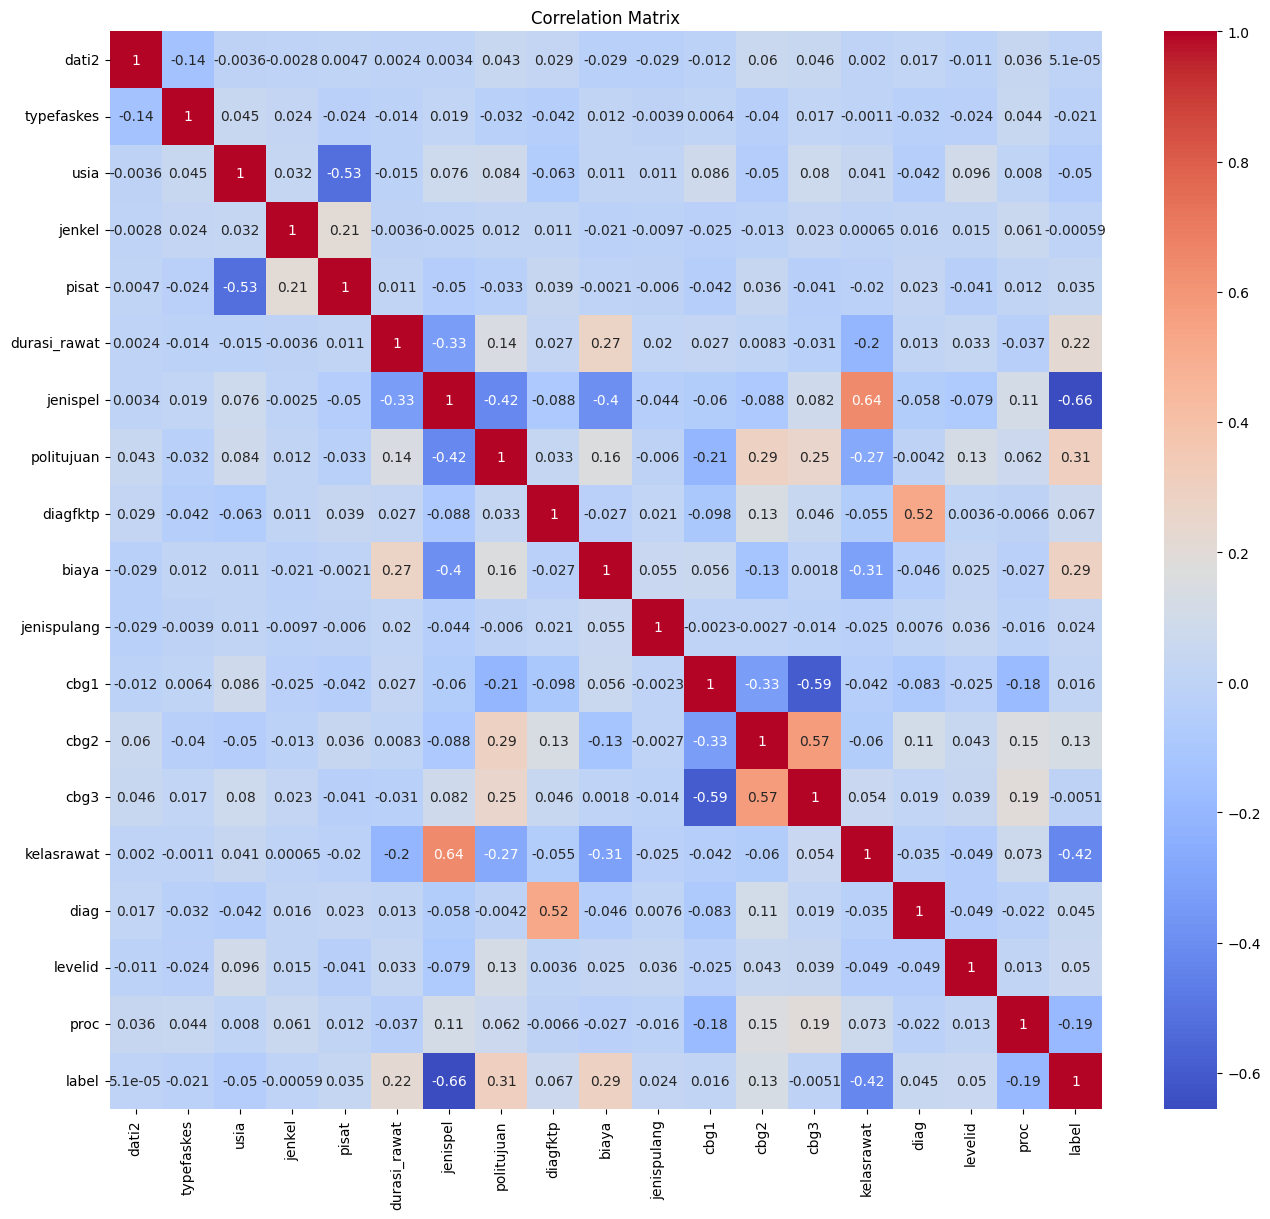

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

df_pandas = df_gabungan2.to_pandas_df()

corr = df_pandas.corr()

plt.figure(figsize=(16, 14))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [68]:
columns = ['dati2', 'typefaskes', 'usia', 'jenkel', 'pisat', 'durasi_rawat', 'jenispel', 'politujuan', 'diagfktp', 'biaya', 'jenispulang', 'cbg1', 'cbg2', 'cbg3', 'kelasrawat', 'diag', 'levelid', 'proc', 'label']
corr = df_pandas[columns].corr()


In [69]:
corr

,dati2,typefaskes,usia,jenkel,pisat,durasi_rawat,jenispel,politujuan,diagfktp,biaya,jenispulang,cbg1,cbg2,cbg3,kelasrawat,diag,levelid,proc,label
dati2,1.000000,-0.137094,-0.003606,-0.002831,0.004701,0.002406,0.003388,0.042801,0.029174,-0.029254,-0.029473,-0.012455,0.059962,0.045856,0.002033,0.016604,-0.010661,0.036121,0.000051
typefaskes,-0.137094,1.000000,0.045039,0.024054,-0.024171,-0.013595,0.019335,-0.032047,-0.042359,0.012117,-0.003920,0.006394,-0.039592,0.016841,-0.001126,-0.031823,-0.024037,0.044271,-0.020540
usia,-0.003606,0.045039,1.000000,0.032451,-0.525765,-0.015428,0.075786,0.084415,-0.063061,0.010911,0.010659,0.085691,-0.050439,0.080223,0.040765,-0.042044,0.096411,0.007963,-0.049524
jenkel,-0.002831,0.024054,0.032451,1.000000,0.209559,-0.003640,-0.002453,0.012113,0.011448,-0.020862,-0.009700,-0.024997,-0.013475,0.023338,0.000654,0.016390,0.014994,0.060997,-0.000587
pisat,0.004701,-0.024171,-0.525765,0.209559,1.000000,0.011191,-0.050066,-0.033409,0.038575,-0.002131,-0.006011,-0.041926,0.036412,-0.041011,-0.020481,0.023443,-0.041261,0.011848,0.034805
durasi_rawat,0.002406,-0.013595,-0.015428,-0.003640,0.011191,1.000000,-0.332771,0.140564,0.026786,0.270011,0.019896,0.026722,0.008326,-0.031042,-0.203823,0.013468,0.033286,-0.036735,0.218637
jenispel,0.003388,0.019335,0.075786,-0.002453,-0.050066,-0.332771,1.000000,-0.421930,-0.088180,-0.396690,-0.044396,-0.059819,-0.087616,0.081662,0.644869,-0.058128,-0.078710,0.111369,-0.656300
politujuan,0.042801,-0.032047,0.084415,0.012113,-0.033409,0.140564,-0.421930,1.000000,0.032520,0.162175,-0.005968,-0.208237,0.288548,0.249824,-0.272580,-0.004244,0.125089,0.061986,0.305899
diagfktp,0.029174,-0.042359,-0.063061,0.011448,0.038575,0.026786,-0.088180,0.032520,1.000000,-0.026502,0.020937,-0.098073,0.133317,0.045997,-0.055479,0.524606,0.003647,-0.006593,0.067244
biaya,-0.029254,0.012117,0.010911,-0.020862,-0.002131,0.270011,-0.396690,0.162175,-0.026502,1.000000,0.054686,0.056279,-0.125720,0.001790,-0.314394,-0.046492,0.024538,-0.027349,0.292909


In [70]:
df_gabungan2

#,dati2,typefaskes,usia,jenkel,pisat,durasi_rawat,jenispel,politujuan,diagfktp,biaya,jenispulang,cbg1,cbg2,cbg3,kelasrawat,diag,levelid,proc,label
0,17,7,46,1,1.0,0,2,0.027832121318897944,5,186800.0,1.0,4,5,42,3,0,1.0,14,0
1,17,10,60,0,1.0,0,2,0.004655543983288377,5,211400.0,1.0,4,5,12,3,5,1.0,14,0
2,17,10,15,0,4.0,0,2,0.01182811870449665,9,114400.0,1.0,16,3,16,3,9,1.0,14,0
3,17,8,37,1,1.0,0,2,0.027832121318897944,11,479000.0,1.0,8,3,13,3,11,1.0,14,0
4,17,2,51,1,3.0,0,2,0.040830350785725604,21,571000.0,1.0,6,3,23,3,8,1.0,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"4,760,826",79,0,47,1,1.0,0,2,0.038072433094254586,7,213700.0,1.0,14,3,12,3,13,1.0,14,0
"4,760,827",79,0,73,0,2.0,0,2,0.038072433094254586,7,213700.0,1.0,14,3,12,3,7,1.0,14,0
"4,760,828",79,0,73,0,2.0,0,2,0.038072433094254586,7,213700.0,1.0,14,3,12,3,13,2.0,14,0
"4,760,829",81,10,44,0,1.0,0,2,0.027832121318897944,8,259200.0,1.0,14,3,11,3,14,2.0,14,0


In [71]:
print(type(df_gabungan2)) 


<class 'vaex.dataframe.DataFrameLocal'>


In [72]:
df_gabungan2.export_csv("DataGabungan3.csv")

## Dataset yang sudah bersih

# RUN MODel MULAI DARI SINI

# Pembuatan Model (Stratified Split Tanpa Imbalance)

In [38]:
%%time

df_gabungan3 = vaex.from_csv('DataGabungan3.csv', convert=True, chunk_size=100_000)

CPU times: total: 15.6 ms
Wall time: 82.9 ms


## Pembagian Data

In [24]:
# Stratified Split

import vaex
import numpy as np

# Dataset
target = 'label'

# Rasio test
test_size = 0.2
random_state = 42
np.random.seed(random_state)

classes = df_gabungan3[target].unique()

# Simpan hasil split
dfs_train = []
dfs_test = []

# Stratified split per class
for c in classes:
    df_class = df_gabungan3[df_gabungan3[target] == c]
    
    # Ambil index acak
    n = len(df_class)
    indices = np.random.permutation(n)
    test_count = int(n * test_size)

    test_idx = indices[:test_count]
    train_idx = indices[test_count:]

    # Buat subset
    df_train_c = df_class.take(train_idx)
    df_test_c = df_class.take(test_idx)

    dfs_train.append(df_train_c)
    dfs_test.append(df_test_c)

# Gabungkan semua class
df_train = vaex.concat(dfs_train)
df_test = vaex.concat(dfs_test)


In [25]:
print(df_train['label'].value_counts())
print(df_test['label'].value_counts())

0    3614029
1     194636
dtype: int64
0    903507
1     48659
dtype: int64


Masih butuh yang balanced split

In [26]:
df_train

#,dati2,typefaskes,usia,jenkel,pisat,durasi_rawat,jenispel,politujuan,diagfktp,biaya,jenispulang,cbg1,cbg2,cbg3,kelasrawat,diag,levelid,proc,label
0,50,20,51,1,1.0,0,2,0.0078812850751797,5,300700.0,1.0,15,3,16,3,5,1.0,10,0
1,233,13,31,0,1.0,0,2,0.0408220500787261,17,358000.0,1.0,20,5,10,3,17,1.0,14,0
2,37,10,63,0,1.0,0,2,0.0380724330942545,7,7650800.0,1.0,14,2,36,3,7,1.0,14,0
3,113,10,55,1,1.0,0,2,0.0408303507857256,4,183300.0,1.0,4,5,44,3,9,1.0,14,0
4,67,0,35,1,3.0,0,2,0.0200496472482717,20,315000.0,1.0,6,3,25,3,20,1.0,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"3,808,660",133,20,37,0,1.0,0,2,0.0408220500787261,17,204200.0,1.0,20,5,14,3,17,1.0,8,1
"3,808,661",470,22,22,0,1.0,0,2,0.0429111020373613,5,242100.0,1.0,22,5,18,3,5,1.0,8,1
"3,808,662",219,10,25,1,4.0,2,1,0.2375566279874568,20,1828500.0,1.0,11,6,13,3,20,2.0,12,1
"3,808,663",141,10,26,1,4.0,3,1,0.2375566279874568,20,3707000.0,1.0,11,6,11,3,3,2.0,14,1


In [27]:
df_train.export_csv("TrainStratified.csv")

In [28]:
df_test

#,dati2,typefaskes,usia,jenkel,pisat,durasi_rawat,jenispel,politujuan,diagfktp,biaya,jenispulang,cbg1,cbg2,cbg3,kelasrawat,diag,levelid,proc,label
0,171,20,70,1,3.0,0,2,0.0118281187044966,10,112800.0,1.0,16,3,16,3,15,1.0,14,0
1,117,10,71,1,3.0,0,2,0.0118281187044966,15,153700.0,1.0,6,3,12,3,21,2.0,14,0
2,34,20,60,0,1.0,0,2,0.2375566279874568,15,192700.0,1.0,4,5,44,3,4,2.0,14,0
3,199,6,68,0,5.0,0,2,0.2375566279874568,13,176200.0,1.0,4,5,44,3,13,1.0,14,0
4,290,8,0,0,4.0,0,2,0.0278321213188979,15,380200.0,1.0,13,9,14,3,2,1.0,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"952,161",115,24,51,1,3.0,0,2,0.0278321213188979,18,377100.0,1.0,4,5,44,3,21,2.0,8,1
"952,162",406,0,54,1,1.0,1,1,0.2375566279874568,16,5142300.0,1.0,16,4,12,1,16,2.0,14,1
"952,163",155,20,60,1,3.0,0,2,0.2375566279874568,4,275100.0,1.0,4,5,43,3,21,2.0,8,1
"952,164",144,20,48,1,3.0,0,2,0.0408220500787261,17,315200.0,1.0,20,5,12,3,17,1.0,14,1


In [29]:
df_test.export_csv("TestStratified.csv")

## Training dan Testing Model

In [30]:
%%time

df_stratified = vaex.from_csv('DataGabungan3.csv', convert=True, chunk_size=100_000)

CPU times: total: 15.6 ms
Wall time: 54.1 ms


In [33]:
df_stratified

#,dati2,typefaskes,usia,jenkel,pisat,durasi_rawat,jenispel,politujuan,diagfktp,biaya,jenispulang,cbg1,cbg2,cbg3,kelasrawat,diag,levelid,proc,label
0,17,7,46,1,1.0,0,2,0.0278321213188979,5,186800.0,1.0,4,5,42,3,0,1.0,14,0
1,17,10,60,0,1.0,0,2,0.0046555439832883,5,211400.0,1.0,4,5,12,3,5,1.0,14,0
2,17,10,15,0,4.0,0,2,0.0118281187044966,9,114400.0,1.0,16,3,16,3,9,1.0,14,0
3,17,8,37,1,1.0,0,2,0.0278321213188979,11,479000.0,1.0,8,3,13,3,11,1.0,14,0
4,17,2,51,1,3.0,0,2,0.0408303507857256,21,571000.0,1.0,6,3,23,3,8,1.0,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"4,760,826",79,0,47,1,1.0,0,2,0.0380724330942545,7,213700.0,1.0,14,3,12,3,13,1.0,14,0
"4,760,827",79,0,73,0,2.0,0,2,0.0380724330942545,7,213700.0,1.0,14,3,12,3,7,1.0,14,0
"4,760,828",79,0,73,0,2.0,0,2,0.0380724330942545,7,213700.0,1.0,14,3,12,3,13,2.0,14,0
"4,760,829",81,10,44,0,1.0,0,2,0.0278321213188979,8,259200.0,1.0,14,3,11,3,14,2.0,14,0


In [31]:
%%time

df_test = vaex.from_csv('TestStratified.csv', convert=True, chunk_size=100_000)

CPU times: total: 2.22 s
Wall time: 4.57 s


In [34]:
df_test

#,dati2,typefaskes,usia,jenkel,pisat,durasi_rawat,jenispel,politujuan,diagfktp,biaya,jenispulang,cbg1,cbg2,cbg3,kelasrawat,diag,levelid,proc,label
0,171,20,70,1,3.0,0,2,0.0118281187044966,10,112800.0,1.0,16,3,16,3,15,1.0,14,0
1,117,10,71,1,3.0,0,2,0.0118281187044966,15,153700.0,1.0,6,3,12,3,21,2.0,14,0
2,34,20,60,0,1.0,0,2,0.2375566279874568,15,192700.0,1.0,4,5,44,3,4,2.0,14,0
3,199,6,68,0,5.0,0,2,0.2375566279874568,13,176200.0,1.0,4,5,44,3,13,1.0,14,0
4,290,8,0,0,4.0,0,2,0.0278321213188979,15,380200.0,1.0,13,9,14,3,2,1.0,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"952,161",115,24,51,1,3.0,0,2,0.0278321213188979,18,377100.0,1.0,4,5,44,3,21,2.0,8,1
"952,162",406,0,54,1,1.0,1,1,0.2375566279874568,16,5142300.0,1.0,16,4,12,1,16,2.0,14,1
"952,163",155,20,60,1,3.0,0,2,0.2375566279874568,4,275100.0,1.0,4,5,43,3,21,2.0,8,1
"952,164",144,20,48,1,3.0,0,2,0.0408220500787261,17,315200.0,1.0,20,5,12,3,17,1.0,14,1


In [32]:
%%time

df_train = vaex.from_csv('TrainStratified.csv', convert=True, chunk_size=100_000)

CPU times: total: 7.78 s
Wall time: 20.4 s


In [35]:
df_train

#,dati2,typefaskes,usia,jenkel,pisat,durasi_rawat,jenispel,politujuan,diagfktp,biaya,jenispulang,cbg1,cbg2,cbg3,kelasrawat,diag,levelid,proc,label
0,50,20,51,1,1.0,0,2,0.0078812850751797,5,300700.0,1.0,15,3,16,3,5,1.0,10,0
1,233,13,31,0,1.0,0,2,0.0408220500787261,17,358000.0,1.0,20,5,10,3,17,1.0,14,0
2,37,10,63,0,1.0,0,2,0.0380724330942545,7,7650800.0,1.0,14,2,36,3,7,1.0,14,0
3,113,10,55,1,1.0,0,2,0.0408303507857256,4,183300.0,1.0,4,5,44,3,9,1.0,14,0
4,67,0,35,1,3.0,0,2,0.0200496472482717,20,315000.0,1.0,6,3,25,3,20,1.0,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"3,808,660",133,20,37,0,1.0,0,2,0.0408220500787261,17,204200.0,1.0,20,5,14,3,17,1.0,8,1
"3,808,661",470,22,22,0,1.0,0,2,0.0429111020373613,5,242100.0,1.0,22,5,18,3,5,1.0,8,1
"3,808,662",219,10,25,1,4.0,2,1,0.2375566279874568,20,1828500.0,1.0,11,6,13,3,20,2.0,12,1
"3,808,663",141,10,26,1,4.0,3,1,0.2375566279874568,20,3707000.0,1.0,11,6,11,3,3,2.0,14,1



 Training model: learning_rate=0.05, max_depth=3


c:\Users\alpia\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:158: UserWarning: [22:44:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)


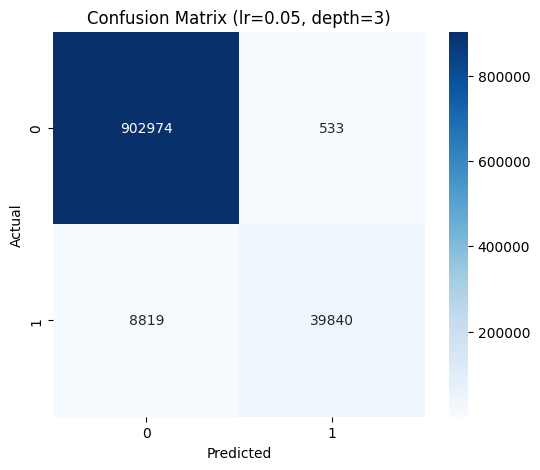

Akurasi: 0.9902
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    903507
           1       0.99      0.82      0.89     48659

    accuracy                           0.99    952166
   macro avg       0.99      0.91      0.94    952166
weighted avg       0.99      0.99      0.99    952166


 Training model: learning_rate=0.05, max_depth=5


c:\Users\alpia\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:158: UserWarning: [22:52:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)


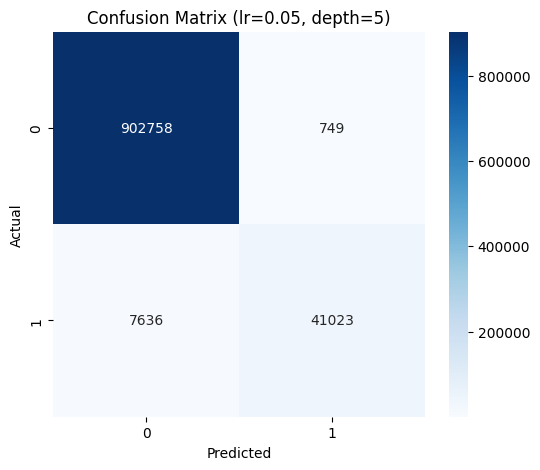

Akurasi: 0.9912
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    903507
           1       0.98      0.84      0.91     48659

    accuracy                           0.99    952166
   macro avg       0.99      0.92      0.95    952166
weighted avg       0.99      0.99      0.99    952166


 Training model: learning_rate=0.1, max_depth=3


c:\Users\alpia\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:158: UserWarning: [22:59:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)


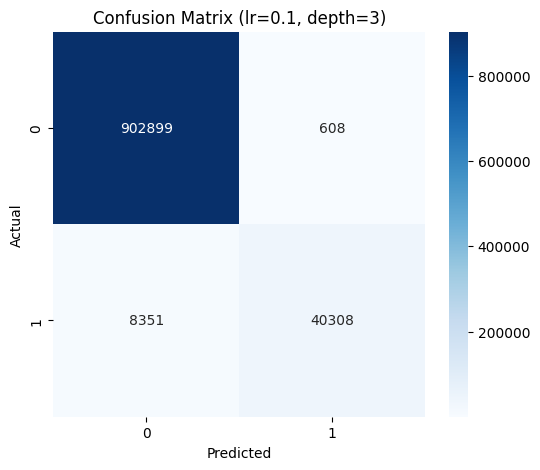

Akurasi: 0.9906
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    903507
           1       0.99      0.83      0.90     48659

    accuracy                           0.99    952166
   macro avg       0.99      0.91      0.95    952166
weighted avg       0.99      0.99      0.99    952166


 Training model: learning_rate=0.1, max_depth=5


c:\Users\alpia\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:158: UserWarning: [23:07:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)


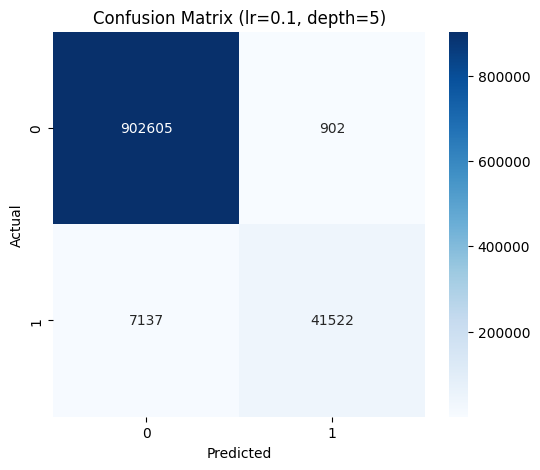

Akurasi: 0.9916
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    903507
           1       0.98      0.85      0.91     48659

    accuracy                           0.99    952166
   macro avg       0.99      0.93      0.95    952166
weighted avg       0.99      0.99      0.99    952166


✅ Model terbaik: learning_rate=0.1, max_depth=5, akurasi=0.9916


In [36]:
from vaex.ml.xgboost import XGBoostModel
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import json

# -------------------------------------
# 1. Setup awal
# -------------------------------------
df = df_stratified

# # Split data HANYA SEKALI
# df_train, df_test = df.ml.train_test_split(test_size=0.2, verbose=True, seed=42)

# Fitur dan target
features = ['dati2', 'typefaskes', 'usia', 'jenkel', 'pisat', 'durasi_rawat', 'jenispel', 
            'politujuan', 'diagfktp', 'biaya', 'jenispulang', 'cbg1', 'cbg2', 'cbg3', 
            'kelasrawat', 'diag', 'levelid', 'proc']
target = 'label'

# -------------------------------------
# 2. Loop parameter & simpan hasil
# -------------------------------------
results = []

for lr in [0.05, 0.1]:
    for max_d in [3, 5]:
        print(f'\n Training model: learning_rate={lr}, max_depth={max_d}')
        
        params = {
            'learning_rate': lr,
            'max_depth': max_d,
            'num_class': 3,
            'objective': 'multi:softmax',
            'subsample': 1,
            'random_state': 42,
            'n_jobs': -1
        }

        # Buat dan latih model
        booster = XGBoostModel(features=features, target=target, num_boost_round=500, params=params)
        booster.fit(df=df_train, evals=[(df_train, 'train'), (df_test, 'test')], early_stopping_rounds=5)

        # Transformasi test set
        df_test_pred = booster.transform(df_test)

        # Evaluasi
        y_true = df_test_pred[target].to_numpy()
        y_pred = df_test_pred['xgboost_prediction'].to_numpy()

        acc = accuracy_score(y_true, y_pred)
        conf_matrix = confusion_matrix(y_true, y_pred)
        class_report = classification_report(y_true, y_pred, output_dict=True)

        # Simpan hasil evaluasi
        results.append({
            'learning_rate': lr,
            'max_depth': max_d,
            'accuracy': acc,
            'confusion_matrix': conf_matrix.tolist(),
            'classification_report': class_report
        })

        # Tampilkan confusion matrix
        plt.figure(figsize=(6,5))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
                    xticklabels=df_test_pred[target].unique(), 
                    yticklabels=df_test_pred[target].unique())
        plt.title(f'Confusion Matrix (lr={lr}, depth={max_d})')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

        # Tampilkan akurasi
        print(f"Akurasi: {acc:.4f}")
        print(classification_report(y_true, y_pred))

# -------------------------------------
# 3. Simpan hasil ke file
# -------------------------------------
# Simpan ringkasan akurasi ke CSV
summary_df = pd.DataFrame([
    {'learning_rate': r['learning_rate'], 'max_depth': r['max_depth'], 'accuracy': r['accuracy']}
    for r in results
])
summary_df.to_csv('hasil_eksperimen_vaex.csv', index=False)

# Simpan laporan lengkap ke JSON
with open('hasil_lengkap_vaex.json', 'w') as f:
    json.dump(results, f, indent=2)

# Tampilkan model terbaik
best = max(results, key=lambda r: r['accuracy'])
print(f"\n✅ Model terbaik: learning_rate={best['learning_rate']}, max_depth={best['max_depth']}, akurasi={best['accuracy']:.4f}")


# Pembuatan Model (Stratified Split dan Random Oversampling)

In [2]:
%%time

df_gabungan3 = vaex.from_csv('DataGabungan3.csv', convert=True, chunk_size=100_000)

CPU times: total: 1 s
Wall time: 5.16 s


## Pembagian Data

In [3]:
# Stratified Split

import vaex
import numpy as np

# Dataset
target = 'label'

# Rasio test
test_size = 0.2
random_state = 42
np.random.seed(random_state)

classes = df_gabungan3[target].unique()

# Simpan hasil split
dfs_train = []
dfs_test = []

# Stratified split per class
for c in classes:
    df_class = df_gabungan3[df_gabungan3[target] == c]
    
    # Ambil index acak
    n = len(df_class)
    indices = np.random.permutation(n)
    test_count = int(n * test_size)

    test_idx = indices[:test_count]
    train_idx = indices[test_count:]

    # Buat subset
    df_train_c = df_class.take(train_idx)
    df_test_c = df_class.take(test_idx)

    dfs_train.append(df_train_c)
    dfs_test.append(df_test_c)

# Gabungkan semua class
df_train = vaex.concat(dfs_train)
df_test = vaex.concat(dfs_test)


## Handling Imbalance

In [4]:
# Random Oversampling

import vaex
import numpy as np

class_counts = df_train.groupby(target, agg={'count': vaex.agg.count()})
counts_dict = dict(zip(class_counts[target].tolist(), class_counts['count'].tolist()))

max_count = max(counts_dict.values())

dfs_balanced = []

for label, count in counts_dict.items():
    df_class = df_train[df_train[target] == label]
    
    if count < max_count:
        n_needed = max_count - count
        
        indices = np.random.choice(len(df_class), size=n_needed, replace=True)
        
        df_oversampled = df_class.take(indices)
        
        df_balanced_class = vaex.concat([df_class, df_oversampled])
    else:
        df_balanced_class = df_class
    
    dfs_balanced.append(df_balanced_class)

df_train_balanced = vaex.concat(dfs_balanced)

print("Distribusi Kelas Setelah Oversampling:")
print(df_train_balanced[target].value_counts())


Distribusi Kelas Setelah Oversampling:
1    3614029
0    3614029
dtype: int64


In [5]:
df_train_balanced

#,dati2,typefaskes,usia,jenkel,pisat,durasi_rawat,jenispel,politujuan,diagfktp,biaya,jenispulang,cbg1,cbg2,cbg3,kelasrawat,diag,levelid,proc,label
0,50,20,51,1,1.0,0,2,0.0078812850751797,5,300700.0,1.0,15,3,16,3,5,1.0,10,0
1,233,13,31,0,1.0,0,2,0.0408220500787261,17,358000.0,1.0,20,5,10,3,17,1.0,14,0
2,37,10,63,0,1.0,0,2,0.0380724330942545,7,7650800.0,1.0,14,2,36,3,7,1.0,14,0
3,113,10,55,1,1.0,0,2,0.0408303507857256,4,183300.0,1.0,4,5,44,3,9,1.0,14,0
4,67,0,35,1,3.0,0,2,0.0200496472482717,20,315000.0,1.0,6,3,25,3,20,1.0,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"7,228,053",214,6,0,1,4.0,2,1,0.2375566279874568,19,6540900.0,1.0,13,8,13,1,19,1.0,14,1
"7,228,054",221,7,0,0,4.0,2,1,0.2375566279874568,19,4796700.0,1.0,13,8,17,1,19,1.0,8,1
"7,228,055",339,0,34,1,1.0,3,1,0.2375566279874568,20,7760100.0,1.0,10,1,20,3,15,2.0,12,1
"7,228,056",127,10,63,0,1.0,0,2,0.0278321213188979,8,2147000.0,1.0,4,5,43,3,8,1.0,8,1


In [6]:
df_train_balanced.export_csv("TrainStratifiedOversampling.csv")

In [7]:
df_test

#,dati2,typefaskes,usia,jenkel,pisat,durasi_rawat,jenispel,politujuan,diagfktp,biaya,jenispulang,cbg1,cbg2,cbg3,kelasrawat,diag,levelid,proc,label
0,171,20,70,1,3.0,0,2,0.0118281187044966,10,112800.0,1.0,16,3,16,3,15,1.0,14,0
1,117,10,71,1,3.0,0,2,0.0118281187044966,15,153700.0,1.0,6,3,12,3,21,2.0,14,0
2,34,20,60,0,1.0,0,2,0.2375566279874568,15,192700.0,1.0,4,5,44,3,4,2.0,14,0
3,199,6,68,0,5.0,0,2,0.2375566279874568,13,176200.0,1.0,4,5,44,3,13,1.0,14,0
4,290,8,0,0,4.0,0,2,0.0278321213188979,15,380200.0,1.0,13,9,14,3,2,1.0,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"952,161",115,24,51,1,3.0,0,2,0.0278321213188979,18,377100.0,1.0,4,5,44,3,21,2.0,8,1
"952,162",406,0,54,1,1.0,1,1,0.2375566279874568,16,5142300.0,1.0,16,4,12,1,16,2.0,14,1
"952,163",155,20,60,1,3.0,0,2,0.2375566279874568,4,275100.0,1.0,4,5,43,3,21,2.0,8,1
"952,164",144,20,48,1,3.0,0,2,0.0408220500787261,17,315200.0,1.0,20,5,12,3,17,1.0,14,1


In [8]:
df_test.export_csv("TestStratifiedOversampling.csv")

In [9]:
df_gabungan3

#,dati2,typefaskes,usia,jenkel,pisat,durasi_rawat,jenispel,politujuan,diagfktp,biaya,jenispulang,cbg1,cbg2,cbg3,kelasrawat,diag,levelid,proc,label
0,17,7,46,1,1.0,0,2,0.0278321213188979,5,186800.0,1.0,4,5,42,3,0,1.0,14,0
1,17,10,60,0,1.0,0,2,0.0046555439832883,5,211400.0,1.0,4,5,12,3,5,1.0,14,0
2,17,10,15,0,4.0,0,2,0.0118281187044966,9,114400.0,1.0,16,3,16,3,9,1.0,14,0
3,17,8,37,1,1.0,0,2,0.0278321213188979,11,479000.0,1.0,8,3,13,3,11,1.0,14,0
4,17,2,51,1,3.0,0,2,0.0408303507857256,21,571000.0,1.0,6,3,23,3,8,1.0,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"4,760,826",79,0,47,1,1.0,0,2,0.0380724330942545,7,213700.0,1.0,14,3,12,3,13,1.0,14,0
"4,760,827",79,0,73,0,2.0,0,2,0.0380724330942545,7,213700.0,1.0,14,3,12,3,7,1.0,14,0
"4,760,828",79,0,73,0,2.0,0,2,0.0380724330942545,7,213700.0,1.0,14,3,12,3,13,2.0,14,0
"4,760,829",81,10,44,0,1.0,0,2,0.0278321213188979,8,259200.0,1.0,14,3,11,3,14,2.0,14,0


In [10]:
df_gabungan3 = df_train_balanced.concat(df_test)


In [11]:
df_gabungan3

#,dati2,typefaskes,usia,jenkel,pisat,durasi_rawat,jenispel,politujuan,diagfktp,biaya,jenispulang,cbg1,cbg2,cbg3,kelasrawat,diag,levelid,proc,label
0,50,20,51,1,1.0,0,2,0.0078812850751797,5,300700.0,1.0,15,3,16,3,5,1.0,10,0
1,233,13,31,0,1.0,0,2,0.0408220500787261,17,358000.0,1.0,20,5,10,3,17,1.0,14,0
2,37,10,63,0,1.0,0,2,0.0380724330942545,7,7650800.0,1.0,14,2,36,3,7,1.0,14,0
3,113,10,55,1,1.0,0,2,0.0408303507857256,4,183300.0,1.0,4,5,44,3,9,1.0,14,0
4,67,0,35,1,3.0,0,2,0.0200496472482717,20,315000.0,1.0,6,3,25,3,20,1.0,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"8,180,219",115,24,51,1,3.0,0,2,0.0278321213188979,18,377100.0,1.0,4,5,44,3,21,2.0,8,1
"8,180,220",406,0,54,1,1.0,1,1,0.2375566279874568,16,5142300.0,1.0,16,4,12,1,16,2.0,14,1
"8,180,221",155,20,60,1,3.0,0,2,0.2375566279874568,4,275100.0,1.0,4,5,43,3,21,2.0,8,1
"8,180,222",144,20,48,1,3.0,0,2,0.0408220500787261,17,315200.0,1.0,20,5,12,3,17,1.0,14,1


In [12]:
df_gabungan3.export_csv("DatasetStratifiedOversampling.csv")

exprt csv df_gabungan3, df_Train_balanced dan df_test

## Training dan Testing Model (Learning Rate 0.1 dan max_depth 3)

In [13]:
%%time

df_stratifiedoversampling = vaex.from_csv('DatasetStratifiedOversampling.csv', convert=True, chunk_size=100_000)

CPU times: total: 18.6 s
Wall time: 38.9 s


In [15]:
df_stratifiedoversampling

#,dati2,typefaskes,usia,jenkel,pisat,durasi_rawat,jenispel,politujuan,diagfktp,biaya,jenispulang,cbg1,cbg2,cbg3,kelasrawat,diag,levelid,proc,label
0,50,20,51,1,1.0,0,2,0.0078812850751797,5,300700.0,1.0,15,3,16,3,5,1.0,10,0
1,233,13,31,0,1.0,0,2,0.0408220500787261,17,358000.0,1.0,20,5,10,3,17,1.0,14,0
2,37,10,63,0,1.0,0,2,0.0380724330942545,7,7650800.0,1.0,14,2,36,3,7,1.0,14,0
3,113,10,55,1,1.0,0,2,0.0408303507857256,4,183300.0,1.0,4,5,44,3,9,1.0,14,0
4,67,0,35,1,3.0,0,2,0.0200496472482717,20,315000.0,1.0,6,3,25,3,20,1.0,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"8,180,219",115,24,51,1,3.0,0,2,0.0278321213188979,18,377100.0,1.0,4,5,44,3,21,2.0,8,1
"8,180,220",406,0,54,1,1.0,1,1,0.2375566279874568,16,5142300.0,1.0,16,4,12,1,16,2.0,14,1
"8,180,221",155,20,60,1,3.0,0,2,0.2375566279874568,4,275100.0,1.0,4,5,43,3,21,2.0,8,1
"8,180,222",144,20,48,1,3.0,0,2,0.0408220500787261,17,315200.0,1.0,20,5,12,3,17,1.0,14,1


In [14]:
%%time

df_train = vaex.from_csv('TrainStratifiedOversampling.csv', convert=True, chunk_size=100_000)

CPU times: total: 15.3 s
Wall time: 35.8 s


In [17]:
df_train

#,dati2,typefaskes,usia,jenkel,pisat,durasi_rawat,jenispel,politujuan,diagfktp,biaya,jenispulang,cbg1,cbg2,cbg3,kelasrawat,diag,levelid,proc,label
0,50,20,51,1,1.0,0,2,0.0078812850751797,5,300700.0,1.0,15,3,16,3,5,1.0,10,0
1,233,13,31,0,1.0,0,2,0.0408220500787261,17,358000.0,1.0,20,5,10,3,17,1.0,14,0
2,37,10,63,0,1.0,0,2,0.0380724330942545,7,7650800.0,1.0,14,2,36,3,7,1.0,14,0
3,113,10,55,1,1.0,0,2,0.0408303507857256,4,183300.0,1.0,4,5,44,3,9,1.0,14,0
4,67,0,35,1,3.0,0,2,0.0200496472482717,20,315000.0,1.0,6,3,25,3,20,1.0,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"7,228,053",214,6,0,1,4.0,2,1,0.2375566279874568,19,6540900.0,1.0,13,8,13,1,19,1.0,14,1
"7,228,054",221,7,0,0,4.0,2,1,0.2375566279874568,19,4796700.0,1.0,13,8,17,1,19,1.0,8,1
"7,228,055",339,0,34,1,1.0,3,1,0.2375566279874568,20,7760100.0,1.0,10,1,20,3,15,2.0,12,1
"7,228,056",127,10,63,0,1.0,0,2,0.0278321213188979,8,2147000.0,1.0,4,5,43,3,8,1.0,8,1


In [20]:
%%time

df_test = vaex.from_csv('TestStratifiedOversampling.csv', convert=True, chunk_size=100_000)

CPU times: total: 1.86 s
Wall time: 5.12 s


In [21]:
df_test

#,dati2,typefaskes,usia,jenkel,pisat,durasi_rawat,jenispel,politujuan,diagfktp,biaya,jenispulang,cbg1,cbg2,cbg3,kelasrawat,diag,levelid,proc,label
0,171,20,70,1,3.0,0,2,0.0118281187044966,10,112800.0,1.0,16,3,16,3,15,1.0,14,0
1,117,10,71,1,3.0,0,2,0.0118281187044966,15,153700.0,1.0,6,3,12,3,21,2.0,14,0
2,34,20,60,0,1.0,0,2,0.2375566279874568,15,192700.0,1.0,4,5,44,3,4,2.0,14,0
3,199,6,68,0,5.0,0,2,0.2375566279874568,13,176200.0,1.0,4,5,44,3,13,1.0,14,0
4,290,8,0,0,4.0,0,2,0.0278321213188979,15,380200.0,1.0,13,9,14,3,2,1.0,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"952,161",115,24,51,1,3.0,0,2,0.0278321213188979,18,377100.0,1.0,4,5,44,3,21,2.0,8,1
"952,162",406,0,54,1,1.0,1,1,0.2375566279874568,16,5142300.0,1.0,16,4,12,1,16,2.0,14,1
"952,163",155,20,60,1,3.0,0,2,0.2375566279874568,4,275100.0,1.0,4,5,43,3,21,2.0,8,1
"952,164",144,20,48,1,3.0,0,2,0.0408220500787261,17,315200.0,1.0,20,5,12,3,17,1.0,14,1



 Training model: learning_rate=0.05, max_depth=3


c:\Users\alpia\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:158: UserWarning: [21:31:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)


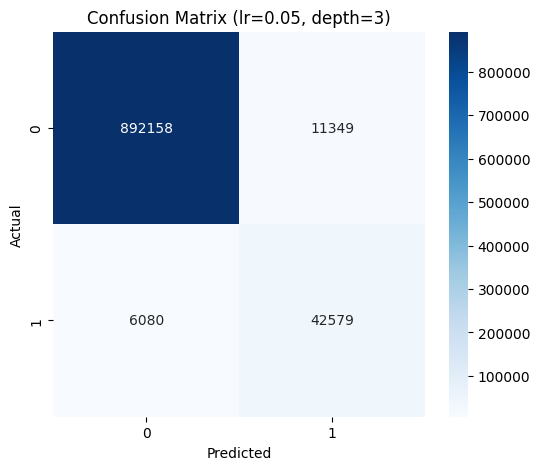

Akurasi: 0.9817
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    903507
           1       0.79      0.88      0.83     48659

    accuracy                           0.98    952166
   macro avg       0.89      0.93      0.91    952166
weighted avg       0.98      0.98      0.98    952166


 Training model: learning_rate=0.05, max_depth=5


c:\Users\alpia\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:158: UserWarning: [21:47:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)


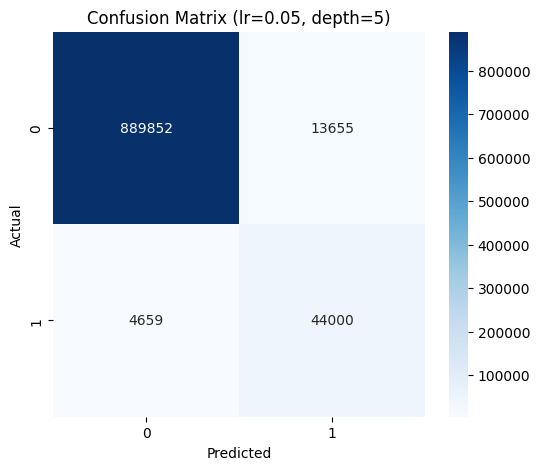

Akurasi: 0.9808
              precision    recall  f1-score   support

           0       0.99      0.98      0.99    903507
           1       0.76      0.90      0.83     48659

    accuracy                           0.98    952166
   macro avg       0.88      0.94      0.91    952166
weighted avg       0.98      0.98      0.98    952166


 Training model: learning_rate=0.1, max_depth=3


c:\Users\alpia\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:158: UserWarning: [22:00:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)


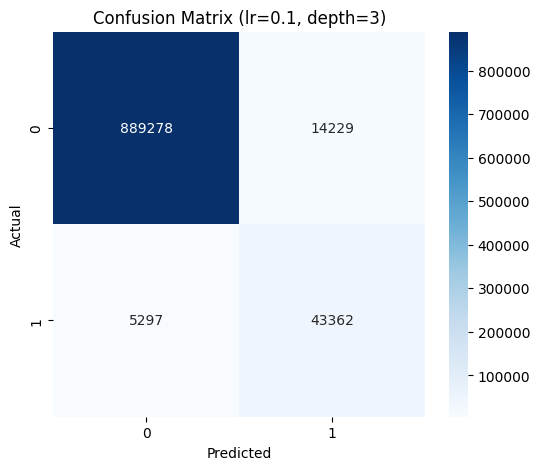

Akurasi: 0.9795
              precision    recall  f1-score   support

           0       0.99      0.98      0.99    903507
           1       0.75      0.89      0.82     48659

    accuracy                           0.98    952166
   macro avg       0.87      0.94      0.90    952166
weighted avg       0.98      0.98      0.98    952166


 Training model: learning_rate=0.1, max_depth=5


c:\Users\alpia\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:158: UserWarning: [22:15:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)


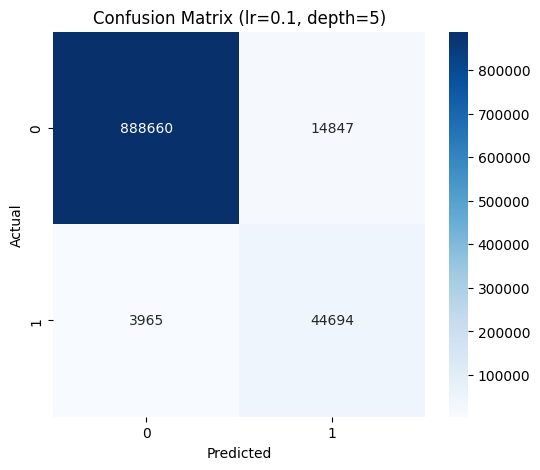

Akurasi: 0.9802
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    903507
           1       0.75      0.92      0.83     48659

    accuracy                           0.98    952166
   macro avg       0.87      0.95      0.91    952166
weighted avg       0.98      0.98      0.98    952166


✅ Model terbaik: learning_rate=0.05, max_depth=3, akurasi=0.9817


In [22]:
from vaex.ml.xgboost import XGBoostModel
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import json

# -------------------------------------
# 1. Setup awal
# -------------------------------------
df = df_stratifiedoversampling

# df = df.shuffle(seed=42)

# # Split data HANYA SEKALI
# df_train, df_test = df.ml.train_test_split(test_size=0.2, verbose=True, seed=42)

# Fitur dan target
features = ['dati2', 'typefaskes', 'usia', 'jenkel', 'pisat', 'durasi_rawat', 'jenispel', 
            'politujuan', 'diagfktp', 'biaya', 'jenispulang', 'cbg1', 'cbg2', 'cbg3', 
            'kelasrawat', 'diag', 'levelid', 'proc']
target = 'label'

# -------------------------------------
# 2. Loop parameter & simpan hasil
# -------------------------------------
results = []

for lr in [0.05, 0.1]:
    for max_d in [3, 5]:
        print(f'\n Training model: learning_rate={lr}, max_depth={max_d}')
        
        params = {
            'learning_rate': lr,
            'max_depth': max_d,
            'num_class': 3,
            'objective': 'multi:softmax',
            'subsample': 1,
            'random_state': 42,
            'n_jobs': -1
        }

        # Buat dan latih model
        booster = XGBoostModel(features=features, target=target, num_boost_round=500, params=params)
        booster.fit(df=df_train, evals=[(df_train, 'train'), (df_test, 'test')], early_stopping_rounds=5)

        # Transformasi test set
        df_test_pred = booster.transform(df_test)

        # Evaluasi
        y_true = df_test_pred[target].to_numpy()
        y_pred = df_test_pred['xgboost_prediction'].to_numpy()

        acc = accuracy_score(y_true, y_pred)
        conf_matrix = confusion_matrix(y_true, y_pred)
        class_report = classification_report(y_true, y_pred, output_dict=True)

        # Simpan hasil evaluasi
        results.append({
            'learning_rate': lr,
            'max_depth': max_d,
            'accuracy': acc,
            'confusion_matrix': conf_matrix.tolist(),
            'classification_report': class_report
        })

        # Tampilkan confusion matrix
        plt.figure(figsize=(6,5))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
                    xticklabels=df_test_pred[target].unique(), 
                    yticklabels=df_test_pred[target].unique())
        plt.title(f'Confusion Matrix (lr={lr}, depth={max_d})')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

        # Tampilkan akurasi
        print(f"Akurasi: {acc:.4f}")
        print(classification_report(y_true, y_pred))

# -------------------------------------
# 3. Simpan hasil ke file
# -------------------------------------
# Simpan ringkasan akurasi ke CSV
summary_df = pd.DataFrame([
    {'learning_rate': r['learning_rate'], 'max_depth': r['max_depth'], 'accuracy': r['accuracy']}
    for r in results
])
summary_df.to_csv('hasil_eksperimen_vaex.csv', index=False)


# Tampilkan model terbaik
best = max(results, key=lambda r: r['accuracy'])
print(f"\n✅ Model terbaik: learning_rate={best['learning_rate']}, max_depth={best['max_depth']}, akurasi={best['accuracy']:.4f}")


# Pembuatan Model (Balanced Split)

In [90]:
%%time

df_gabungan3 = vaex.from_csv('DataGabungan3.csv', convert=True, chunk_size=100_000)

CPU times: total: 0 ns
Wall time: 46.6 ms


In [69]:
df_gabungan3

#,dati2,typefaskes,usia,jenkel,pisat,durasi_rawat,jenispel,politujuan,diagfktp,biaya,jenispulang,cbg1,cbg2,cbg3,kelasrawat,diag,levelid,proc,label
0,17,7,46,1,1.0,0,2,0.0278321213188979,5,186800.0,1.0,4,5,42,3,0,1.0,14,0
1,17,10,60,0,1.0,0,2,0.0046555439832883,5,211400.0,1.0,4,5,12,3,5,1.0,14,0
2,17,10,15,0,4.0,0,2,0.0118281187044966,9,114400.0,1.0,16,3,16,3,9,1.0,14,0
3,17,8,37,1,1.0,0,2,0.0278321213188979,11,479000.0,1.0,8,3,13,3,11,1.0,14,0
4,17,2,51,1,3.0,0,2,0.0408303507857256,21,571000.0,1.0,6,3,23,3,8,1.0,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"4,760,826",79,0,47,1,1.0,0,2,0.0380724330942545,7,213700.0,1.0,14,3,12,3,13,1.0,14,0
"4,760,827",79,0,73,0,2.0,0,2,0.0380724330942545,7,213700.0,1.0,14,3,12,3,7,1.0,14,0
"4,760,828",79,0,73,0,2.0,0,2,0.0380724330942545,7,213700.0,1.0,14,3,12,3,13,2.0,14,0
"4,760,829",81,10,44,0,1.0,0,2,0.0278321213188979,8,259200.0,1.0,14,3,11,3,14,2.0,14,0


In [ ]:
df_class_0 = df_gabungan3.filter(df_gabungan3.label == 0).extract()
df_class_1 = df_gabungan3.filter(df_gabungan3.label == 1).extract()

# Jumlah minimum sampel dari kedua kelas
min_samples = min(len(df_class_0), len(df_class_1))

# Sampling acak
df_0_bal = df_class_0.sample(n=min_samples, random_state=42)
df_1_bal = df_class_1.sample(n=min_samples, random_state=42)

# Gabungkan dan shuffle hasil balancing
df_balanced = df_0_bal.concat(df_1_bal).sample(frac=1.0, random_state=42)

# Split 80% train, 20% test
n_total = len(df_balanced)
n_test = int(n_total * 0.2)

df_train = df_balanced[:n_total - n_test]
df_test = df_balanced[n_total - n_test:]

TypeError: object of type 'NoneType' has no len()

In [88]:
df_class_0 = df_gabungan3.filter(df_gabungan3.label == 0).extract()
df_class_1 = df_gabungan3.filter(df_gabungan3.label == 1).extract()

# 2. Hitung jumlah data test dari masing-masing label (misalnya 20%)
n_test_0 = int(len(df_class_0) * 0.2)
n_test_1 = int(len(df_class_1) * 0.2)

# 3. Ambil sampel test secara acak dari masing-masing label
df_test_0 = df_class_0.sample(n=n_test_0, random_state=42)
df_test_1 = df_class_1.sample(n=n_test_1, random_state=42)

# 4. Gabungkan test set → seimbang
df_test = df_test_0.concat(df_test_1)

# 5. Sisanya jadi training set (drop yang sudah diambil untuk test)
df_train_0 = df_class_0.drop(df_test_0)
df_train_1 = df_class_1.drop(df_test_1)
df_train = df_train_0.concat(df_train_1)


ValueError: #        dati2    typefaskes    usia    jenkel    pisat    durasi_rawat    jenispel    politujuan          diagfktp    biaya     jenispulang    cbg1    cbg2    cbg3    kelasrawat    diag    levelid    proc    label
0        171      12            64      0         1.0      0               2           0.0438008416414001  21          208800.0  1.0            6       3       27      3             15      1.0        14      0
1        140      9             1       0         4.0      0               2           0.0105433308641428  6           257000.0  1.0            15      3       15      3             6       1.0        14      0
2        283      10            51      1         1.0      0               2           0.0408303507857256  10          265000.0  1.0            14      2       33      3             4       2.0        16      0
3        179      20            76      0         1.0      0               2           0.0370897054927905  4           190400.0  1.0            4       5       44      3             21      1.0        14      0
4        342      2             13      0         4.0      0               2           0.0278321213188979  16          201200.0  1.0            6       3       27      3             16      1.0        14      0
...      ...      ...           ...     ...       ...      ...             ...         ...                 ...         ...       ...            ...     ...     ...     ...           ...     ...        ...     ...
952,161  131      20            38      1         1.0      0               2           0.0438008416414001  21          190400.0  1.0            4       5       44      3             15      1.0        14      0
952,162  496      0             51      0         1.0      0               2           0.0278321213188979  16          182600.0  1.0            4       5       42      3             16      2.0        14      0
952,163  102      0             55      0         1.0      0               2           0.0019136385512382  8           793300.0  1.0            19      3       15      3             15      2.0        8       0
952,164  294      10            56      1         3.0      0               2           0.0456989224772109  18          300700.0  1.0            2       2       42      3             12      1.0        5       0
952,165  115      12            2       1         4.0      0               2           0.0560403390953737  17          278800.0  1.0            20      5       16      3             17      1.0        14      0 is not of string or Expression type, but <class 'vaex.dataframe.DataFrameLocal'>

In [83]:
print(df_train['label'].value_counts())
print(df_test['label'].value_counts())

0    7227969
1     389361
dtype: int64
0    1807103
1      97229
dtype: int64
